In [203]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [204]:
visitation_2017 = pd.read_csv('./data/visitation_by_state_and_by_park_2017.csv')
visitation_2018 = pd.read_csv('./data/visitation_by_state_and_by_park_2018.csv')
visitation_2019 = pd.read_csv('./data/visitation_by_state_and_by_park_2019.csv')
visitation_2020 = pd.read_csv('./data/visitation_by_state_and_by_park_2020.csv')
visitation_2021 = pd.read_csv('./data/visitation_by_state_and_by_park_2021.csv')
visitation_2022 = pd.read_csv('./data/visitation_by_state_and_by_park_2022.csv')
visitation_2023 = pd.read_csv('./data/visitation_by_state_and_by_park_2023.csv')
visitation_2024 = pd.read_csv('./data/visitation_by_state_and_by_park_2024.csv') 

In [205]:
dfs = [ visitation_2017, visitation_2018, visitation_2019, visitation_2020, visitation_2021, visitation_2022, visitation_2023, visitation_2024]

In [206]:
df_merged = pd.concat(dfs)
df_merged.year.value_counts()

year
2024    425
2023    420
2022    414
2021    413
2020    408
2017    403
2018    403
2019    403
Name: count, dtype: int64

1. How much has visitation at the New River Gorge increased year-over-year?

In [207]:
df_merged

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year
0,Alabama,Horseshoe Bend NMP,"74,255","15,009","1,014,144","180,109","338,014",0,0,0,0,0,0,0,2017
1,Alabama,Little River Canyon NPRES,"367,058","80,380",0,"964,562",0,0,0,0,0,0,0,0,2017
2,Alabama,Natchez Trace PKWY,"442,825","148,659","613,012","1,783,918","613,012",0,0,0,0,0,0,0,2017
3,Alabama,Russell Cave NM,"24,377","3,243",0,"38,927",0,0,0,0,0,0,0,0,2017
4,Alabama,Tuskegee Airmen NHS,"39,322","4,915",0,"58,982",0,0,0,0,0,0,0,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Wyoming,Fort Laramie NHS,"44,045","5,707",0,"68,493",0,0,0,0,0,0,0,0,2024
421,Wyoming,Fossil Butte NM,"21,491","2,974",250,"35,697",213,0,0,0,0,0,0,0,2024
422,Wyoming,Grand Teton NP,"3,628,222","1,866,580","1,528,765","22,398,968","1,528,765","196,568","355,025",49,5,"38,830",0,0,2024
423,Wyoming,"John D. Rockefeller, Jr. MEM PKWY","1,459,804","192,781","10,800","2,313,382","2,700","20,093","21,545",0,0,0,0,0,2024


In [208]:
df_merged['recreation_visitors'] = df_merged['recreation_visitors'].str.replace(',', '', regex=False).astype(int)
df_merged['non_recreation_visitors'] = df_merged['non_recreation_visitors'].str.replace(',', '', regex=False).astype(int)
df_merged['concessioner_lodging_overnights'] = df_merged['concessioner_lodging_overnights'].str.replace(',', '', regex=False).astype(int)
df_merged['tent_overnights'] = df_merged['tent_overnights'].str.replace(',', '', regex=False).astype(int)
df_merged['recreation_vehicle_overnights'] = df_merged['recreation_vehicle_overnights'].str.replace(',', '', regex=False).astype(int)
df_merged['back_country_overnights'] = df_merged['back_country_overnights'].str.replace(',', '', regex=False).astype(int)
df_merged['non_recreation_overnights'] = df_merged['non_recreation_overnights'].str.replace(',', '', regex=False).astype(int)
df_merged['misc_overnights'] = df_merged['misc_overnights'].str.replace(',', '', regex=False).astype(int)
df_merged['recreation_visitor_hours'] = df_merged['recreation_visitor_hours'].str.replace(',', '', regex=False).astype(int)
df_merged['non_recreation_visitor_hours'] = df_merged['non_recreation_visitor_hours'].str.replace(',', '', regex=False).astype(int)

In [209]:
df_merged['total_overnight_stays'] = df_merged.concessioner_lodging_overnights + df_merged.tent_overnights + df_merged.recreation_vehicle_overnights + df_merged.back_country_overnights + df_merged.non_recreation_overnights + df_merged.misc_overnights
df_merged

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays
0,Alabama,Horseshoe Bend NMP,74255,"15,009",1014144,180109,338014,0,0,0,0,0,0,0,2017,0
1,Alabama,Little River Canyon NPRES,367058,"80,380",0,964562,0,0,0,0,0,0,0,0,2017,0
2,Alabama,Natchez Trace PKWY,442825,"148,659",613012,1783918,613012,0,0,0,0,0,0,0,2017,0
3,Alabama,Russell Cave NM,24377,"3,243",0,38927,0,0,0,0,0,0,0,0,2017,0
4,Alabama,Tuskegee Airmen NHS,39322,"4,915",0,58982,0,0,0,0,0,0,0,0,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Wyoming,Fort Laramie NHS,44045,"5,707",0,68493,0,0,0,0,0,0,0,0,2024,0
421,Wyoming,Fossil Butte NM,21491,"2,974",250,35697,213,0,0,0,0,0,0,0,2024,0
422,Wyoming,Grand Teton NP,3628222,"1,866,580",1528765,22398968,1528765,196568,"355,025",49,5,38830,0,0,2024,235452
423,Wyoming,"John D. Rockefeller, Jr. MEM PKWY",1459804,"192,781",10800,2313382,2700,20093,"21,545",0,0,0,0,0,2024,20093


In [210]:
df_merged['total_visitation'] = df_merged.recreation_visitors + df_merged.non_recreation_visitors
df_merged

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation
0,Alabama,Horseshoe Bend NMP,74255,"15,009",1014144,180109,338014,0,0,0,0,0,0,0,2017,0,1088399
1,Alabama,Little River Canyon NPRES,367058,"80,380",0,964562,0,0,0,0,0,0,0,0,2017,0,367058
2,Alabama,Natchez Trace PKWY,442825,"148,659",613012,1783918,613012,0,0,0,0,0,0,0,2017,0,1055837
3,Alabama,Russell Cave NM,24377,"3,243",0,38927,0,0,0,0,0,0,0,0,2017,0,24377
4,Alabama,Tuskegee Airmen NHS,39322,"4,915",0,58982,0,0,0,0,0,0,0,0,2017,0,39322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Wyoming,Fort Laramie NHS,44045,"5,707",0,68493,0,0,0,0,0,0,0,0,2024,0,44045
421,Wyoming,Fossil Butte NM,21491,"2,974",250,35697,213,0,0,0,0,0,0,0,2024,0,21741
422,Wyoming,Grand Teton NP,3628222,"1,866,580",1528765,22398968,1528765,196568,"355,025",49,5,38830,0,0,2024,235452,5156987
423,Wyoming,"John D. Rockefeller, Jr. MEM PKWY",1459804,"192,781",10800,2313382,2700,20093,"21,545",0,0,0,0,0,2024,20093,1470604


In [211]:
df_merged['total_hours_visited'] = df_merged.recreation_visitor_hours + df_merged.non_recreation_visitor_hours
df_merged

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
0,Alabama,Horseshoe Bend NMP,74255,"15,009",1014144,180109,338014,0,0,0,0,0,0,0,2017,0,1088399,518123
1,Alabama,Little River Canyon NPRES,367058,"80,380",0,964562,0,0,0,0,0,0,0,0,2017,0,367058,964562
2,Alabama,Natchez Trace PKWY,442825,"148,659",613012,1783918,613012,0,0,0,0,0,0,0,2017,0,1055837,2396930
3,Alabama,Russell Cave NM,24377,"3,243",0,38927,0,0,0,0,0,0,0,0,2017,0,24377,38927
4,Alabama,Tuskegee Airmen NHS,39322,"4,915",0,58982,0,0,0,0,0,0,0,0,2017,0,39322,58982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Wyoming,Fort Laramie NHS,44045,"5,707",0,68493,0,0,0,0,0,0,0,0,2024,0,44045,68493
421,Wyoming,Fossil Butte NM,21491,"2,974",250,35697,213,0,0,0,0,0,0,0,2024,0,21741,35910
422,Wyoming,Grand Teton NP,3628222,"1,866,580",1528765,22398968,1528765,196568,"355,025",49,5,38830,0,0,2024,235452,5156987,23927733
423,Wyoming,"John D. Rockefeller, Jr. MEM PKWY",1459804,"192,781",10800,2313382,2700,20093,"21,545",0,0,0,0,0,2024,20093,1470604,2316082


In [212]:
nrg = df_merged.loc[df_merged.park.str.contains('New River Gorge NP & PRES')]
nrg

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
393,West Virginia,New River Gorge NP & PRES,1168658,"212,460",2400,2549521,4800,0,0,4782,945,0,0,0,2017,5727,1171058,2554321
393,West Virginia,New River Gorge NP & PRES,1232627,"212,427",2400,2549126,4800,0,0,4872,999,0,0,0,2018,5871,1235027,2553926
393,West Virginia,New River Gorge NP & PRES,1195721,"217,982",2400,2615787,4800,0,0,5074,1032,0,0,0,2019,6106,1198121,2620587
398,West Virginia,New River Gorge NP & PRES,1054374,"229,489",2400,2753877,4800,0,0,815,250,0,0,0,2020,1065,1056774,2758677
403,West Virginia,New River Gorge NP & PRES,1682720,"358,421",2400,4301053,4800,0,0,15550,11214,12609,0,1454,2021,40827,1685120,4305853
404,West Virginia,New River Gorge NP & PRES,1593523,"347,146",2400,4165760,4800,0,0,16061,9963,12530,0,3007,2022,41561,1595923,4170560
410,West Virginia,New River Gorge NP & PRES,1707223,"370,597",2400,4447173,4800,0,0,17214,10501,12609,0,4013,2023,44337,1709623,4451973
414,West Virginia,New River Gorge NP & PRES,1811937,"389,227",2400,4670726,4800,0,0,17157,10516,12609,0,3486,2024,43768,1814337,4675526


In [213]:
hrpferry = df_merged.loc[df_merged.park.str.contains('Harpers Ferry')]
hrpferry

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
392,West Virginia,Harpers Ferry NHP,342535,"114,177",0,1370134,0,0,0,0,0,0,0,0,2017,0,342535,1370134
392,West Virginia,Harpers Ferry NHP,265737,"88,578",0,1062940,0,0,0,0,0,0,0,0,2018,0,265737,1062940
392,West Virginia,Harpers Ferry NHP,299577,"99,858",0,1198304,0,0,0,0,0,0,0,0,2019,0,299577,1198304
397,West Virginia,Harpers Ferry NHP,234473,"78,157",0,937891,0,0,0,0,0,0,0,0,2020,0,234473,937891
402,West Virginia,Harpers Ferry NHP,309901,"103,300",0,1239605,0,0,0,0,0,0,0,0,2021,0,309901,1239605
403,West Virginia,Harpers Ferry NHP,407008,"135,669",0,1628032,0,0,0,0,0,0,0,0,2022,0,407008,1628032
409,West Virginia,Harpers Ferry NHP,427317,"142,438",0,1709265,0,0,0,0,0,0,0,0,2023,0,427317,1709265
413,West Virginia,Harpers Ferry NHP,488049,"162,683",0,1952200,0,0,0,0,0,0,0,0,2024,0,488049,1952200


In [214]:
national_parks = df_merged.loc[df_merged.park.str.contains('NP')]
national_parks

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,367058,"80,380",0,964562,0,0,0,0,0,0,0,0,2017,0,367058,964562
7,Alaska,Bering Land Bridge NPRES,2642,660,1128,7926,9024,0,0,0,0,1123,360,0,2017,1483,3770,16950
9,Alaska,Denali NP & PRES,642809,"703,810",793286,8445731,198321,0,"27,248",0,0,32887,0,0,2017,32887,1436095,8644052
10,Alaska,Gates of the Arctic NP & PRES,11177,"13,144",0,157731,0,0,0,0,0,6355,0,0,2017,6355,11177,157731
11,Alaska,Glacier Bay NP & PRES,547057,"588,541",381,7062494,97380,12352,0,901,0,5986,4030,13267,2017,36536,547438,7159874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Washington,North Cascades NP,16485,"25,522",0,306273,0,0,0,0,0,12948,0,0,2024,12948,16485,306273
407,Washington,Olympic NP,3717267,"1,370,970",1086478,16451648,356532,88217,"12,853",130274,92181,124736,0,89,2024,435497,4803745,16808180
414,West Virginia,New River Gorge NP & PRES,1811937,"389,227",2400,4670726,4800,0,0,17157,10516,12609,0,3486,2024,43768,1814337,4675526
422,Wyoming,Grand Teton NP,3628222,"1,866,580",1528765,22398968,1528765,196568,"355,025",49,5,38830,0,0,2024,235452,5156987,23927733


In [215]:
east_coast = df_merged.loc[df_merged['state'].isin(['Delware', 'West Virginia', 'Florida', 'Georgia', 'New Jersey', 'North Carolina', 'Vermont', 'Virginia', 'South Carolina', 'Maryland', 'Connecticut', 'Pennsylvania', 'New York', 'Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island'])]
east_coast

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
87,Connecticut,Weir Farm NHP,38096,"5,889",0,70668,0,0,0,0,0,0,0,0,2017,0,38096,70668
108,Florida,Big Cypress NPRES,922883,"258,862",0,3106348,0,0,0,2128,8814,2532,0,0,2017,13474,922883,3106348
109,Florida,Biscayne NP,446961,"127,472",0,1529665,0,0,0,2452,0,0,0,5414,2017,7866,446961,1529665
110,Florida,Canaveral NS,1598586,"337,571",0,4050858,0,0,0,0,0,2465,0,0,2017,2465,1598586,4050858
111,Florida,Castillo de San Marcos NM,876975,"54,810",0,657731,0,0,0,0,0,0,0,0,2017,0,876975,657731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Virginia,Wolf Trap NP for the Performing Arts,447863,"149,287",0,1791452,0,0,0,0,0,0,0,0,2024,0,447863,1791452
411,West Virginia,Bluestone NSR,7327,"1,526",0,18319,0,0,0,0,0,0,0,0,2024,0,7327,18319
412,West Virginia,Gauley River NRA,272898,"127,421",0,1529054,0,0,0,4693,4409,0,0,0,2024,9102,272898,1529054
413,West Virginia,Harpers Ferry NHP,488049,"162,683",0,1952200,0,0,0,0,0,0,0,0,2024,0,488049,1952200


In [216]:
east_coast_np = east_coast.loc[east_coast.park.str.contains('NP')]
east_coast_np

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
108,Florida,Big Cypress NPRES,922883,"258,862",0,3106348,0,0,0,2128,8814,2532,0,0,2017,13474,922883,3106348
109,Florida,Biscayne NP,446961,"127,472",0,1529665,0,0,0,2452,0,0,0,5414,2017,7866,446961,1529665
113,Florida,Dry Tortugas NP,54281,"56,364",1476,676371,17712,0,0,5342,0,0,1476,5524,2017,12342,55757,694083
114,Florida,Everglades NP,1018557,"309,902",6766,3718824,30449,0,0,5238,8137,17393,0,3981,2017,34749,1025323,3749273
160,Maine,Acadia NP,3509271,"2,001,197",47100,24014370,47100,0,"1,657",152586,55812,1597,0,10889,2017,220884,3556371,24061470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,North Carolina,Great Smoky Mountains NP,2884314,"945,676",0,11348115,0,0,0,61966,63524,31249,0,17382,2024,174121,2884314,11348115
326,South Carolina,Congaree NP,242049,"81,537",0,978448,0,0,0,7915,0,745,0,3955,2024,12615,242049,978448
396,Virginia,Shenandoah NP,1720211,"870,952",10962,10451424,2742,46496,0,127314,65937,28544,0,560,2024,268851,1731173,10454166
398,Virginia,Wolf Trap NP for the Performing Arts,447863,"149,287",0,1791452,0,0,0,0,0,0,0,0,2024,0,447863,1791452


In [217]:
west_coast = df_merged.loc[df_merged['state'].isin(['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'])]
west_coast

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
6,Alaska,Aniakchak NM & PRES,100,470,0,5640,0,0,0,0,0,235,0,0,2017,235,100,5640
7,Alaska,Bering Land Bridge NPRES,2642,660,1128,7926,9024,0,0,0,0,1123,360,0,2017,1483,3770,16950
8,Alaska,Cape Krusenstern NM,15000,"3,116",7500,37400,60000,0,0,0,0,6375,5525,0,2017,11900,22500,97400
9,Alaska,Denali NP & PRES,642809,"703,810",793286,8445731,198321,0,"27,248",0,0,32887,0,0,2017,32887,1436095,8644052
10,Alaska,Gates of the Arctic NP & PRES,11177,"13,144",0,157731,0,0,0,0,0,6355,0,0,2017,6355,11177,157731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Washington,North Cascades NP,16485,"25,522",0,306273,0,0,0,0,0,12948,0,0,2024,12948,16485,306273
407,Washington,Olympic NP,3717267,"1,370,970",1086478,16451648,356532,88217,"12,853",130274,92181,124736,0,89,2024,435497,4803745,16808180
408,Washington,Ross Lake NRA,971173,"295,926",720,3551117,720,15079,0,50349,21141,18067,0,2861,2024,107497,971893,3551837
409,Washington,San Juan Island NHP,405925,"56,309",74023,675713,18508,0,0,0,0,0,0,0,2024,0,479948,694221


In [218]:
west_coast_np = west_coast.loc[west_coast.park.str.contains('NP')]
west_coast_np

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
7,Alaska,Bering Land Bridge NPRES,2642,660,1128,7926,9024,0,0,0,0,1123,360,0,2017,1483,3770,16950
9,Alaska,Denali NP & PRES,642809,"703,810",793286,8445731,198321,0,"27,248",0,0,32887,0,0,2017,32887,1436095,8644052
10,Alaska,Gates of the Arctic NP & PRES,11177,"13,144",0,157731,0,0,0,0,0,6355,0,0,2017,6355,11177,157731
11,Alaska,Glacier Bay NP & PRES,547057,"588,541",381,7062494,97380,12352,0,901,0,5986,4030,13267,2017,36536,547438,7159874
12,Alaska,Katmai NP & PRES,37818,"19,440",0,233289,0,4216,0,2098,0,483,0,0,2017,6797,37818,233289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Hawaii,Hawaii Volcanoes NP,1433593,"764,915",1881779,9178984,620988,31137,"5,413",1050,57,5558,0,59547,2024,97349,3315372,9799972
303,Oregon,Crater Lake NP,504942,"254,763",49600,3057164,24800,31394,"38,144",0,0,1234,0,0,2024,32628,554542,3081964
405,Washington,Mount Rainier NP,1620006,"1,637,817",870722,19653806,870722,44433,0,52110,29983,53823,0,531,2024,180880,2490728,20524528
406,Washington,North Cascades NP,16485,"25,522",0,306273,0,0,0,0,0,12948,0,0,2024,12948,16485,306273


In [219]:
nrg_2017 = df_merged.loc[(df_merged.year==2017) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2017

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
393,West Virginia,New River Gorge NP & PRES,1168658,"212,460",2400,2549521,4800,0,0,4782,945,0,0,0,2017,5727,1171058,2554321


In [220]:
nrg_2017.state

393    West Virginia
Name: state, dtype: object

In [221]:
nrg_total_visitation_2017 = nrg_2017.recreation_visitors + nrg_2017.non_recreation_visitors
nrg_total_visitation_2017

393    1171058
dtype: int32

In [222]:
nrg_2018 = df_merged.loc[(df_merged.year==2018) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2018

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
393,West Virginia,New River Gorge NP & PRES,1232627,"212,427",2400,2549126,4800,0,0,4872,999,0,0,0,2018,5871,1235027,2553926


In [223]:
nrg_total_visitation_2018 = nrg_2018.recreation_visitors + nrg_2018.non_recreation_visitors
nrg_total_visitation_2018

393    1235027
dtype: int32

In [224]:
nrg_2019 = df_merged.loc[(df_merged.year==2019) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2019

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
393,West Virginia,New River Gorge NP & PRES,1195721,"217,982",2400,2615787,4800,0,0,5074,1032,0,0,0,2019,6106,1198121,2620587


In [225]:
nrg_total_visitation_2019 = nrg_2019.recreation_visitors + nrg_2019.non_recreation_visitors
nrg_total_visitation_2019.values

array([1198121])

In [226]:
nrg_2020 = df_merged.loc[(df_merged.year==2020) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2020

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
398,West Virginia,New River Gorge NP & PRES,1054374,"229,489",2400,2753877,4800,0,0,815,250,0,0,0,2020,1065,1056774,2758677


In [227]:
nrg_total_visitation_2020 = nrg_2020.recreation_visitors + nrg_2020.non_recreation_visitors
nrg_total_visitation_2020

398    1056774
dtype: int32

In [228]:
nrg_2021 = df_merged.loc[(df_merged.year==2021) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2021

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
403,West Virginia,New River Gorge NP & PRES,1682720,"358,421",2400,4301053,4800,0,0,15550,11214,12609,0,1454,2021,40827,1685120,4305853


In [229]:
nrg_total_visitation_2021 = nrg_2021.recreation_visitors + nrg_2021.non_recreation_visitors
nrg_total_visitation_2021

403    1685120
dtype: int32

In [230]:
nrg_2022 = df_merged.loc[(df_merged.year==2022) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2022

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
404,West Virginia,New River Gorge NP & PRES,1593523,"347,146",2400,4165760,4800,0,0,16061,9963,12530,0,3007,2022,41561,1595923,4170560


In [231]:
nrg_total_visitation_2022 = nrg_2022.recreation_visitors + nrg_2022.non_recreation_visitors
nrg_total_visitation_2022

404    1595923
dtype: int32

In [232]:
nrg_2023 = df_merged.loc[(df_merged.year==2023) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2023

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
410,West Virginia,New River Gorge NP & PRES,1707223,"370,597",2400,4447173,4800,0,0,17214,10501,12609,0,4013,2023,44337,1709623,4451973


In [233]:
nrg_total_visitation_2023 = nrg_2023.recreation_visitors + nrg_2023.non_recreation_visitors
nrg_total_visitation_2023

410    1709623
dtype: int32

In [234]:
nrg_2024 = df_merged.loc[(df_merged.year==2024) & (df_merged.park == 'New River Gorge NP & PRES')]
nrg_2024

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
414,West Virginia,New River Gorge NP & PRES,1811937,"389,227",2400,4670726,4800,0,0,17157,10516,12609,0,3486,2024,43768,1814337,4675526


In [235]:
nrg_total_visitation_2024 = nrg_2024.recreation_visitors + nrg_2024.non_recreation_visitors
nrg_total_visitation_2024

414    1814337
dtype: int32

In [236]:
# Growth betweeen 2017 - 2018 ((Final Value - Initial Value) / Initial Value) * 100

growth_2017_to_2018 = ((nrg_total_visitation_2018 - nrg_total_visitation_2017) / nrg_total_visitation_2017) * 100
growth_2017_to_2018

# 2017 to 2018 had a 5.46% Growth Rate
#Also important to note here that NRG was not officially a National Park at this time.

393    5.462496
dtype: float64

In [237]:
# Growth between 2018-2019 ((Final Value - Initial Value) / Initial Value) * 100

growth_2018_to_2019 = ((nrg_total_visitation_2019 - nrg_total_visitation_2018) / nrg_total_visitation_2018) * 100
growth_2018_to_2019

# 2018 to 2019 had a -2.99% Growth Rate (this is what we will be looking at across all parks)
#2019 was the year that New River Gorge received its National Park recognition. 

393   -2.988275
dtype: float64

In [238]:
# Growth betweeen 2019 - 2020 ((Final Value - Initial Value) / Initial Value) * 100

growth_2019_to_2020 = ((nrg_total_visitation_2020.values - nrg_total_visitation_2019.values) / nrg_total_visitation_2019.values) * 100
growth_2019_to_2020 = pd.Series(growth_2019_to_2020)
growth_2019_to_2020

# 2019 to 2020 has a -11.8% growth rate
# It's important to note here that this was during COVID (this is what we will be lookin at across all parks)

0   -11.797389
dtype: float64

In [239]:
growth_2020_to_2021 = ((nrg_total_visitation_2021.values - nrg_total_visitation_2020.values) / nrg_total_visitation_2020.values) * 100
growth_2020_to_2021 = pd.Series(growth_2020_to_2021)
growth_2020_to_2021

0    59.458881
dtype: float64

In [240]:
growth_2021_to_2022 = ((nrg_total_visitation_2022.values - nrg_total_visitation_2021.values) / nrg_total_visitation_2021.values) * 100
growth_2021_to_2022 = pd.Series(growth_2021_to_2022)
growth_2021_to_2022

0   -5.293214
dtype: float64

In [241]:
growth_2022_to_2023 = ((nrg_total_visitation_2023.values - nrg_total_visitation_2022.values) / nrg_total_visitation_2022.values) * 100
growth_2022_to_2023 = pd.Series(growth_2022_to_2023)
growth_2022_to_2023

0    7.124404
dtype: float64

In [242]:
growth_2023_to_2024 = ((nrg_total_visitation_2024.values - nrg_total_visitation_2023.values) / nrg_total_visitation_2023.values) * 100
growth_2023_to_2024 = pd.Series(growth_2023_to_2024)
growth_2023_to_2024

0    6.124976
dtype: float64

In [243]:
growth_2017_to_2024 = ((nrg_total_visitation_2024.values - nrg_total_visitation_2017.values) / nrg_total_visitation_2017.values) * 100
growth_2017_to_2024 = pd.Series(growth_2017_to_2024)
growth_2017_to_2024

0    54.931438
dtype: float64

In [244]:
growth_2019_to_2024 = ((nrg_total_visitation_2024.values - nrg_total_visitation_2019.values) / nrg_total_visitation_2019.values) * 100
growth_2019_to_2024 = pd.Series(growth_2019_to_2024)
growth_2019_to_2024

0    51.431867
dtype: float64

In [245]:
go = pd.concat([growth_2017_to_2018,growth_2018_to_2019], axis=0, join='outer', ignore_index=False)
go1 =pd.concat([go, growth_2019_to_2020], axis=0, join='outer', ignore_index=False)
go2 = pd.concat([go1, growth_2020_to_2021], axis=0, join='outer', ignore_index=False)
go3 = pd.concat([go2, growth_2021_to_2022], axis=0, join='outer', ignore_index=False)
go4 = pd.concat([go3, growth_2022_to_2023], axis=0, join='outer', ignore_index=False)
nrg_growth_over_time = pd.concat([go4, growth_2023_to_2024], axis=0, join='outer', ignore_index=False)
nrg_growth_overtime = pd.Series(nrg_growth_over_time)
nrg_grow = nrg_growth_overtime.to_frame().reset_index()
nrg_grow = nrg_grow.rename(columns={0: 'growth'})
nrg_grow['year'] = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']
nrg_grow

,index,growth,year
0,393,5.462496,2017-2018
1,393,-2.988275,2018-2019
2,0,-11.797389,2019-2020
3,0,59.458881,2020-2021
4,0,-5.293214,2021-2022
5,0,7.124404,2022-2023
6,0,6.124976,2023-2024


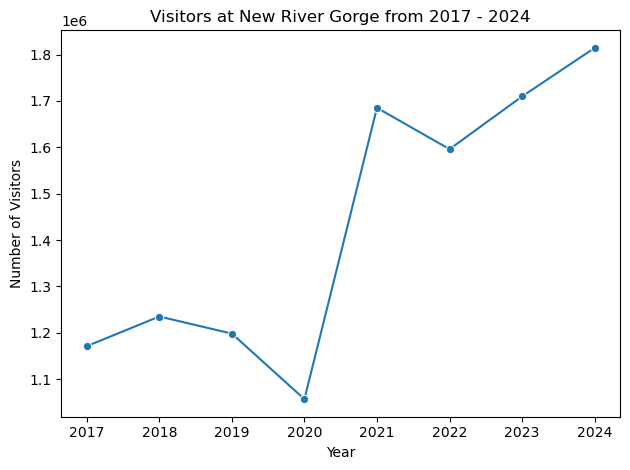

In [246]:
data = {
    'Year' : [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Visitors' : [1171058, 1235027, 1198121, 1056774, 1685120, 1595923, 1709623, 1814337]
}

sns.lineplot(x='Year', y='Visitors', data=data, marker='o')

plt.title('Visitors at New River Gorge from 2017 - 2024')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')

plt.tight_layout()
plt.show()

In [247]:
east_coast_2019 = east_coast.loc[east_coast.year == 2019]
east_coast_2019

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
87,Connecticut,Weir Farm NHP,38700,"6,028",0,72339,0,0,0,0,0,0,0,0,2019,0,38700,72339
108,Florida,Big Cypress NPRES,1007471,"282,807",0,3393687,0,0,0,2982,11400,4026,0,0,2019,18408,1007471,3393687
109,Florida,Biscayne NP,708522,"183,764",0,2205175,0,0,0,238,0,0,0,3079,2019,3317,708522,2205175
110,Florida,Canaveral NS,1884122,"395,875",0,4750502,0,0,0,0,0,2453,0,0,2019,2453,1884122,4750502
111,Florida,Castillo de San Marcos NM,673395,"42,087",0,505047,0,0,0,0,0,0,0,0,2019,0,673395,505047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Virginia,Wolf Trap NP for the Performing Arts,402580,"134,193",0,1610320,0,0,0,0,0,0,0,0,2019,0,402580,1610320
390,West Virginia,Bluestone NSR,37663,"7,846",0,94160,0,0,0,0,0,0,0,0,2019,0,37663,94160
391,West Virginia,Gauley River NRA,119282,"31,653",0,379843,0,0,0,3915,1475,0,0,0,2019,5390,119282,379843
392,West Virginia,Harpers Ferry NHP,299577,"99,858",0,1198304,0,0,0,0,0,0,0,0,2019,0,299577,1198304


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Connecticut'),
  Text(1, 0, 'Florida'),
  Text(2, 0, 'Georgia'),
  Text(3, 0, 'Maine'),
  Text(4, 0, 'Maryland'),
  Text(5, 0, 'Massachusetts'),
  Text(6, 0, 'New Hampshire'),
  Text(7, 0, 'New Jersey'),
  Text(8, 0, 'New York'),
  Text(9, 0, 'North Carolina'),
  Text(10, 0, 'Pennsylvania'),
  Text(11, 0, 'Rhode Island'),
  Text(12, 0, 'South Carolina'),
  Text(13, 0, 'Vermont'),
  Text(14, 0, 'Virginia'),
  Text(15, 0, 'West Virginia')])

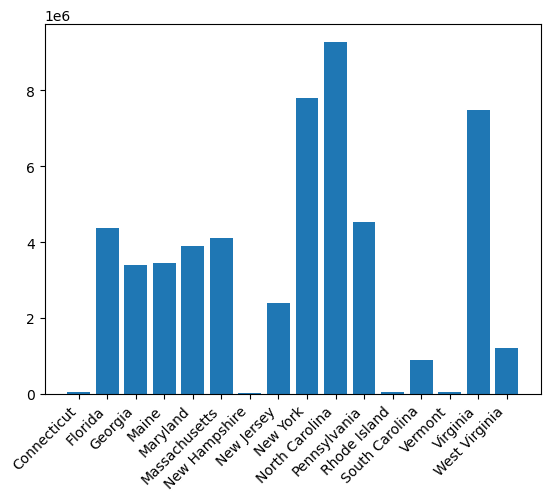

In [248]:
plt.bar(east_coast_2019.state, east_coast_2019.recreation_visitors, width=0.8, bottom=None, align='center')

plt.xticks(rotation=45, ha='right')

In [249]:
national_parks_2017 = national_parks.loc[national_parks.year == 2017]
national_parks_2017

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,367058,"80,380",0,964562,0,0,0,0,0,0,0,0,2017,0,367058,964562
7,Alaska,Bering Land Bridge NPRES,2642,660,1128,7926,9024,0,0,0,0,1123,360,0,2017,1483,3770,16950
9,Alaska,Denali NP & PRES,642809,"703,810",793286,8445731,198321,0,"27,248",0,0,32887,0,0,2017,32887,1436095,8644052
10,Alaska,Gates of the Arctic NP & PRES,11177,"13,144",0,157731,0,0,0,0,0,6355,0,0,2017,6355,11177,157731
11,Alaska,Glacier Bay NP & PRES,547057,"588,541",381,7062494,97380,12352,0,901,0,5986,4030,13267,2017,36536,547438,7159874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Washington,North Cascades NP,30326,"50,600",0,607202,0,0,0,0,0,26081,0,0,2017,26081,30326,607202
386,Washington,Olympic NP,3401996,"1,489,683",777419,17876205,310633,73705,"12,473",178359,76186,122678,0,138,2017,451066,4179415,18186838
393,West Virginia,New River Gorge NP & PRES,1168658,"212,460",2400,2549521,4800,0,0,4782,945,0,0,0,2017,5727,1171058,2554321
400,Wyoming,Grand Teton NP,3317000,"1,871,697",1652347,22460367,1652347,230910,"368,039",79,205,40193,0,2077,2017,273464,4969347,24112714


In [250]:
national_parks_2017_tv = national_parks_2017.sort_values(by='total_visitation', ascending =False)
national_parks_2017_tv.head(10)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
321,Tennessee,Great Smoky Mountains NP,6349780,"3,889,368",10396268,46672418,5198137,11160,0,102500,72938,58438,0,14277,2017,259313,16746048,51870555
28,Arizona,Grand Canyon NP,6254238,"8,217,881",26158,98614576,26158,653927,"32,139",147320,70862,312503,0,29005,2017,1213617,6280396,98640734
267,North Carolina,Great Smoky Mountains NP,4989115,"3,055,932",0,36671185,0,0,0,57964,37159,45914,0,8008,2017,149045,4989115,36671185
400,Wyoming,Grand Teton NP,3317000,"1,871,697",1652347,22460367,1652347,230910,"368,039",79,205,40193,0,2077,2017,273464,4969347,24112714
353,Utah,Zion NP,4504812,"2,522,892",21900,30274711,5475,87216,0,138245,72425,25470,0,22705,2017,346061,4526712,30280186
75,California,Yosemite NP,4336890,"5,938,712",163654,71264549,4281972,826725,0,456476,293844,167507,0,26166,2017,1770718,4500544,75546521
85,Colorado,Rocky Mountain NP,4437215,"2,538,724",8750,30464697,26250,0,0,124179,57627,45194,0,13088,2017,240088,4445965,30490947
386,Washington,Olympic NP,3401996,"1,489,683",777419,17876205,310633,73705,"12,473",178359,76186,122678,0,138,2017,451066,4179415,18186838
46,Arkansas,Hot Springs NP,1561616,"116,796",2455528,1401560,491105,0,0,1467,22543,0,0,0,2017,24010,4017144,1892665
131,Hawaii,Hawaii Volcanoes NP,2016702,"1,045,297",1856243,12543575,612561,34673,"7,807",1536,53,4755,0,89472,2017,130489,3872945,13156136


In [251]:
national_parks_2018 = national_parks.loc[national_parks.year == 2018]
national_parks_2018

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,441177,"105,578",0,1266940,0,0,0,0,0,0,0,0,2018,0,441177,1266940
7,Alaska,Bering Land Bridge NPRES,2642,660,1128,7926,9024,0,0,0,0,1123,360,0,2018,1483,3770,16950
9,Alaska,Denali NP & PRES,594660,"545,547",784032,6546571,196008,0,"27,587",0,0,23748,0,0,2018,23748,1378692,6742579
10,Alaska,Gates of the Arctic NP & PRES,9591,"15,479",0,185752,0,0,0,0,0,7561,0,0,2018,7561,9591,185752
11,Alaska,Glacier Bay NP & PRES,597915,"641,941",644,7703301,95060,12475,0,783,0,5840,3845,17668,2018,40611,598559,7798361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Washington,North Cascades NP,30085,"51,381",0,616576,0,0,0,0,0,26703,0,0,2018,26703,30085,616576
386,Washington,Olympic NP,3104455,"1,464,535",728811,17574425,298579,71958,"11,222",162192,77436,128134,0,218,2018,439938,3833266,17873004
393,West Virginia,New River Gorge NP & PRES,1232627,"212,427",2400,2549126,4800,0,0,4872,999,0,0,0,2018,5871,1235027,2553926
400,Wyoming,Grand Teton NP,3491151,"1,598,022",1617873,19176275,1617873,86797,"320,111",0,0,38803,0,586,2018,126186,5109024,20794148


In [252]:
national_parks_2018_tv = national_parks_2018.sort_values(by='total_visitation', ascending =False)
national_parks_2018_tv.head(10)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
321,Tennessee,Great Smoky Mountains NP,6395874,"3,904,009",10544377,46848110,5272190,11163,0,99636,75045,54654,0,12396,2018,252894,16940251,52120300
28,Arizona,Grand Canyon NP,6380495,"8,375,563",23748,100506766,23748,663982,"38,829",139004,68000,337790,0,27947,2018,1236723,6404243,100530514
400,Wyoming,Grand Teton NP,3491151,"1,598,022",1617873,19176275,1617873,86797,"320,111",0,0,38803,0,586,2018,126186,5109024,20794148
267,North Carolina,Great Smoky Mountains NP,5025330,"3,067,435",0,36809230,0,0,0,52531,38604,42939,0,7709,2018,141783,5025330,36809230
85,Colorado,Rocky Mountain NP,4590493,"2,614,992",8750,31379912,26250,0,0,117924,71016,46840,0,4030,2018,239810,4599243,31406162
353,Utah,Zion NP,4320033,"2,492,823",21900,29913878,5475,86592,0,132988,72016,22964,0,23741,2018,338301,4341933,29919353
75,California,Yosemite NP,4009436,"4,960,791",151651,59529503,3837229,654272,0,354819,259748,124577,0,16667,2018,1410083,4161087,63366732
386,Washington,Olympic NP,3104455,"1,464,535",728811,17574425,298579,71958,"11,222",162192,77436,128134,0,218,2018,439938,3833266,17873004
46,Arkansas,Hot Springs NP,1506887,"111,788",2306072,1341461,461216,0,0,1233,22712,0,0,0,2018,23945,3812959,1802677
160,Maine,Acadia NP,3537575,"1,967,812",47100,23613754,47100,0,"1,364",144744,58215,1472,0,11698,2018,216129,3584675,23660854


In [253]:
national_parks_2019 = national_parks.loc[national_parks.year == 2019]
national_parks_2019

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,649986,"132,309",0,1587719,0,0,0,0,0,0,0,0,2019,0,649986,1587719
7,Alaska,Bering Land Bridge NPRES,2642,660,1128,7926,9024,0,0,0,0,1123,482,0,2019,1605,3770,16950
9,Alaska,Denali NP & PRES,601152,"552,891",787826,6634699,196956,0,"26,382",0,0,26211,0,0,2019,26211,1388978,6831655
10,Alaska,Gates of the Arctic NP & PRES,10518,"8,530",0,102366,0,0,0,0,0,4058,0,0,2019,4058,10518,102366
11,Alaska,Glacier Bay NP & PRES,672087,"713,718",489,8564620,70700,14408,0,744,0,4211,2840,14938,2019,37141,672576,8635320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Washington,North Cascades NP,38208,"56,050",0,672611,0,0,0,0,0,27581,0,0,2019,27581,38208,672611
386,Washington,Olympic NP,3245806,"1,408,253",718520,16899047,294600,76220,"28,645",134569,73701,96864,0,190,2019,381544,3964326,17193647
393,West Virginia,New River Gorge NP & PRES,1195721,"217,982",2400,2615787,4800,0,0,5074,1032,0,0,0,2019,6106,1198121,2620587
400,Wyoming,Grand Teton NP,3405614,"1,766,900",1610087,21202805,1610087,214935,"312,155",0,0,36292,0,0,2019,251227,5015701,22812892


In [254]:
national_parks_2019_tv = national_parks_2019.sort_values(by='total_visitation', ascending =False)
national_parks_2019_tv.head(10)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
321,Tennessee,Great Smoky Mountains NP,7026734,"4,256,167",10544367,51074007,5272185,10955,0,105483,76723,52958,0,10685,2019,256804,17571101,56346192
28,Arizona,Grand Canyon NP,5974411,"7,832,927",21249,93995133,21249,575922,"47,401",120208,63565,320032,0,25201,2019,1104928,5995660,94016382
267,North Carolina,Great Smoky Mountains NP,5521007,"3,344,131",0,40129575,0,0,0,49925,36817,41611,0,8143,2019,136496,5521007,40129575
400,Wyoming,Grand Teton NP,3405614,"1,766,900",1610087,21202805,1610087,214935,"312,155",0,0,36292,0,0,2019,251227,5015701,22812892
85,Colorado,Rocky Mountain NP,4670053,"2,627,946",8750,31535363,26250,0,0,112791,64809,41213,0,877,2019,219690,4678803,31561613
75,California,Yosemite NP,4422861,"5,459,047",163602,65508566,4139502,682273,0,469585,211948,155578,0,30411,2019,1549795,4586463,69648068
353,Utah,Zion NP,4488268,"2,392,962",21900,28715546,5475,82640,0,118290,78704,18320,0,21619,2019,319573,4510168,28721021
386,Washington,Olympic NP,3245806,"1,408,253",718520,16899047,294600,76220,"28,645",134569,73701,96864,0,190,2019,381544,3964326,17193647
36,Arizona,Saguaro NP,1020226,"89,691",2694738,1076297,673686,0,0,0,0,2185,0,0,2019,2185,3714964,1749983
46,Arkansas,Hot Springs NP,1467153,"112,748",2231219,1352979,446244,0,0,1455,24251,0,0,0,2019,25706,3698372,1799223


In [255]:
national_parks_2020 = national_parks.loc[national_parks.year == 2020]
national_parks_2020

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,802375,"168,827",0,2025934,0,0,0,0,0,0,0,0,2020,0,802375,2025934
7,Alaska,Bering Land Bridge NPRES,2642,"2,906",1128,34878,20592,0,0,0,0,1123,482,0,2020,1605,3770,55470
9,Alaska,Denali NP & PRES,54850,"77,921",556019,935054,139003,0,"12,831",0,0,5332,0,0,2020,5332,610869,1074057
10,Alaska,Gates of the Arctic NP & PRES,2872,"2,279",0,27355,0,0,0,0,0,1086,0,0,2020,1086,2872,27355
11,Alaska,Glacier Bay NP & PRES,5748,"19,668",203,236016,48200,0,0,94,0,989,1990,8345,2020,11418,5951,284216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Washington,North Cascades NP,30885,"46,296",0,555560,0,0,0,0,0,22966,0,0,2020,22966,30885,555560
391,Washington,Olympic NP,2499177,"1,147,566",604587,13770793,256633,50826,"9,830",129320,66034,103682,0,56,2020,349918,3103764,14027426
398,West Virginia,New River Gorge NP & PRES,1054374,"229,489",2400,2753877,4800,0,0,815,250,0,0,0,2020,1065,1056774,2758677
405,Wyoming,Grand Teton NP,3289638,"1,486,410",1220029,17836930,1220029,53969,"314,398",0,0,40249,0,0,2020,94218,4509667,19056959


In [256]:
national_parks_2020_tv = national_parks_2020.sort_values(by='total_visitation', ascending =False)
national_parks_2020_tv.head(10)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
326,Tennessee,Great Smoky Mountains NP,6773604,"4,085,709",10544367,49028509,5272185,8083,0,91385,73734,50340,0,120,2020,223662,17317971,54300694
272,North Carolina,Great Smoky Mountains NP,5322116,"3,210,200",0,38522400,0,0,0,53106,41833,39552,0,0,2020,134491,5322116,38522400
405,Wyoming,Grand Teton NP,3289638,"1,486,410",1220029,17836930,1220029,53969,"314,398",0,0,40249,0,0,2020,94218,4509667,19056959
36,Arizona,Saguaro NP,762226,"69,576",2897233,834920,724310,0,0,0,0,3461,0,0,2020,3461,3659459,1559230
358,Utah,Zion NP,3591254,"1,807,539",21900,21690476,5475,29039,0,81108,61792,4906,0,488,2020,177333,3613154,21695951
85,Colorado,Rocky Mountain NP,3305199,"1,799,117",8750,21589410,26250,0,0,31350,37017,41522,0,0,2020,109889,3313949,21615660
391,Washington,Olympic NP,2499177,"1,147,566",604587,13770793,256633,50826,"9,830",129320,66034,103682,0,56,2020,349918,3103764,14027426
407,Wyoming,Yellowstone NP,1865088,"3,125,466",1099227,37505599,557631,148443,"402,775",19731,23290,33457,0,2491,2020,227412,2964315,38063230
28,Arizona,Grand Canyon NP,2897098,"3,734,023",14788,44808278,14788,218922,"31,276",17331,6338,177589,0,497,2020,420677,2911886,44823066
280,Ohio,Cuyahoga Valley NP,2755628,"589,633",0,7075597,0,2141,0,0,0,0,0,0,2020,2141,2755628,7075597


In [257]:
national_parks_2021 = national_parks.loc[national_parks.year == 2021]
national_parks_2021

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,862606,"184,841",0,2218097,0,0,0,0,0,0,0,0,2021,0,862606,2218097
8,Alaska,Bering Land Bridge NPRES,2642,"2,906",1128,34878,20592,0,0,0,0,1123,482,0,2021,1605,3770,55470
10,Alaska,Denali NP & PRES,229521,"283,167",1118096,3398006,279524,0,"21,477",0,0,35646,0,0,2021,35646,1347617,3677530
11,Alaska,Gates of the Arctic NP & PRES,7362,"3,540",0,42489,0,0,0,0,0,1632,0,0,2021,1632,7362,42489
12,Alaska,Glacier Bay NP & PRES,89768,"133,925",494,1607101,109050,18575,0,813,0,3445,4470,8858,2021,36161,90262,1716151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Washington,North Cascades NP,17855,"28,155",0,337862,0,0,0,0,0,14020,0,0,2021,14020,17855,337862
396,Washington,Olympic NP,2718925,"1,406,472",606287,16877666,254857,63550,"14,272",154166,93269,138140,0,54,2021,449179,3325212,17132523
403,West Virginia,New River Gorge NP & PRES,1682720,"358,421",2400,4301053,4800,0,0,15550,11214,12609,0,1454,2021,40827,1685120,4305853
410,Wyoming,Grand Teton NP,3885230,"2,001,918",1587871,24023027,1587871,203127,"386,660",0,0,44435,0,0,2021,247562,5473101,25610898


In [258]:
national_parks_2021_tv = national_parks_2021.sort_values(by='total_visitation', ascending =False)
national_parks_2021_tv.head(10)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
331,Tennessee,Great Smoky Mountains NP,7930467,"4,833,450",10141683,58001400,5070842,10542,0,127419,95732,60244,0,11390,2021,305327,18072150,63072242
277,North Carolina,Great Smoky Mountains NP,6231083,"3,797,710",0,45572529,0,0,0,64012,55626,47337,0,8174,2021,175149,6231083,45572529
410,Wyoming,Grand Teton NP,3885230,"2,001,918",1587871,24023027,1587871,203127,"386,660",0,0,44435,0,0,2021,247562,5473101,25610898
363,Utah,Zion NP,5039835,"2,629,499",21900,31553998,5475,55454,0,138730,89919,15071,0,7969,2021,307143,5061735,31559473
29,Arizona,Grand Canyon NP,4532677,"5,927,482",18243,71129791,18243,393531,"38,293",119531,55661,332295,0,7991,2021,909009,4550920,71148034
86,Colorado,Rocky Mountain NP,4434848,"2,387,360",8750,28648329,26250,0,0,55920,32148,39384,0,0,2021,127452,4443598,28674579
164,Maine,Acadia NP,4069098,"2,170,172",47100,26042074,47100,0,"1,607",107758,40672,1612,0,0,2021,150042,4116198,26089174
37,Arizona,Saguaro NP,1079786,"129,489",2931086,1553872,732770,0,0,0,0,4015,0,0,2021,4015,4010872,2286642
412,Wyoming,Yellowstone NP,2381517,"4,396,895",1295760,52762745,653502,412922,"442,716",52511,59365,36851,0,3323,2021,564972,3677277,53416247
76,California,Yosemite NP,3287595,"3,855,932",133622,46271187,3465801,550098,0,188179,149192,174839,0,3164,2021,1065472,3421217,49736988


In [259]:
national_parks_2022 = national_parks.loc[national_parks.year == 2022]
national_parks_2022

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,726239,"136,555",0,1638667,0,0,0,0,0,0,0,0,2022,0,726239,1638667
8,Alaska,Bering Land Bridge NPRES,2642,"2,906",1126,34878,20624,0,0,0,0,1123,484,0,2022,1607,3768,55502
10,Alaska,Denali NP & PRES,427562,"445,900",903543,5350801,225885,0,"19,877",0,0,33335,0,0,2022,33335,1331105,5576686
11,Alaska,Gates of the Arctic NP & PRES,9457,"8,398",0,100785,0,0,0,0,0,4017,0,0,2022,4017,9457,100785
12,Alaska,Glacier Bay NP & PRES,545758,"584,688",545,7016261,121480,15554,0,724,0,3741,5020,8839,2022,33878,546303,7137741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Washington,North Cascades NP,30154,"46,994",0,563931,0,0,0,0,0,23310,0,0,2022,23310,30154,563931
397,Washington,Olympic NP,2432972,"1,214,799",622476,14577588,223385,69525,"12,781",137274,102358,133751,0,86,2022,442994,3055448,14800973
404,West Virginia,New River Gorge NP & PRES,1593523,"347,146",2400,4165760,4800,0,0,16061,9963,12530,0,3007,2022,41561,1595923,4170560
411,Wyoming,Grand Teton NP,2806223,"1,740,460",1536763,20885529,1536763,196981,"402,336",0,0,40010,0,0,2022,236991,4342986,22422292


In [260]:
national_parks_2022_tv = national_parks_2022.sort_values(by='total_visitation', ascending =False)
national_parks_2022_tv.head(25)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
332,Tennessee,Great Smoky Mountains NP,7245076,"4,480,032",10832000,53760386,5416000,10461,0,142965,107819,54185,0,19077,2022,334507,18077076,59176386
277,North Carolina,Great Smoky Mountains NP,5692558,"3,520,025",0,42240305,0,0,0,70127,50931,42577,0,19560,2022,183195,5692558,42240305
37,Arizona,Saguaro NP,908194,"137,527",4344960,1650326,1086239,0,0,0,0,3706,0,0,2022,3706,5253154,2736565
29,Arizona,Grand Canyon NP,4732101,"6,182,077",7720,74184926,7720,526467,"39,400",89825,56759,331623,0,14141,2022,1018815,4739821,74192646
364,Utah,Zion NP,4692417,"2,494,124",21900,29929496,5475,56528,0,133666,93947,10375,0,30234,2022,324750,4714317,29934971
411,Wyoming,Grand Teton NP,2806223,"1,740,460",1536763,20885529,1536763,196981,"402,336",0,0,40010,0,0,2022,236991,4342986,22422292
86,Colorado,Rocky Mountain NP,4300424,"2,418,351",8750,29020215,26250,0,0,110586,55326,34645,0,548,2022,201105,4309174,29046465
164,Maine,Acadia NP,3970260,"2,223,188",47100,26678263,47100,0,"1,884",136183,49647,1472,0,9490,2022,196792,4017360,26725363
76,California,Yosemite NP,3667550,"4,747,027",144769,56964329,3708989,644508,0,349888,220100,142457,0,22568,2022,1379521,3812319,60673318
134,Hawaii,Hawaii Volcanoes NP,1580961,"867,690",1890756,10412282,623949,34075,"7,516",936,152,4864,0,76756,2022,116783,3471717,11036231


In [261]:
national_parks_2023 = national_parks.loc[national_parks.year == 2023]
national_parks_2023

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,700638,"145,227",0,1742726,0,0,0,0,0,0,0,0,2023,0,700638,1742726
8,Alaska,Bering Land Bridge NPRES,2642,"2,906",1128,34878,20592,0,0,0,0,1123,482,0,2023,1605,3770,55470
10,Alaska,Denali NP & PRES,498722,"498,758",847073,5985104,211768,0,"20,069",0,0,29720,0,0,2023,29720,1345795,6196872
11,Alaska,Gates of the Arctic NP & PRES,11045,"8,438",0,101256,0,0,0,0,0,4000,0,0,2023,4000,11045,101256
12,Alaska,Glacier Bay NP & PRES,703659,"739,098",458,8869184,96100,12354,0,669,0,3648,3960,9518,2023,30149,704117,8965284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Washington,North Cascades NP,40351,"44,320",0,531844,0,0,0,0,0,19125,0,0,2023,19125,40351,531844
403,Washington,Olympic NP,2947503,"1,291,441",1045102,15497301,336937,69534,"12,782",121314,91536,158254,0,91,2023,440729,3992605,15834238
410,West Virginia,New River Gorge NP & PRES,1707223,"370,597",2400,4447173,4800,0,0,17214,10501,12609,0,4013,2023,44337,1709623,4451973
417,Wyoming,Grand Teton NP,3417106,"1,817,854",1570845,21814250,1570845,188653,"362,545",68,0,41705,0,0,2023,230426,4987951,23385095


In [262]:
national_parks_2023_tv = national_parks_2023.sort_values(by='total_visitation', ascending =False)
national_parks_2023_tv.head(25)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
338,Tennessee,Great Smoky Mountains NP,7446682,"4,577,236",10832000,54926832,5416000,10373,0,138965,108073,47339,0,19134,2023,323884,18278682,60342832
282,North Carolina,Great Smoky Mountains NP,5850966,"3,596,399",0,43156797,0,0,0,68105,50138,37193,0,19162,2023,174598,5850966,43156797
37,Arizona,Saguaro NP,1010906,"157,313",4395013,1887764,1098754,0,0,0,0,3515,0,0,2023,3515,5405919,2986518
417,Wyoming,Grand Teton NP,3417106,"1,817,854",1570845,21814250,1570845,188653,"362,545",68,0,41705,0,0,2023,230426,4987951,23385095
29,Arizona,Grand Canyon NP,4733705,"6,171,077",12533,74052927,12533,530029,"37,380",159019,84332,299725,0,27290,2023,1100395,4746238,74065460
370,Utah,Zion NP,4623238,"2,455,943",21900,29471316,5475,95381,0,100411,85948,8497,0,30211,2023,320448,4645138,29476791
87,Colorado,Rocky Mountain NP,4115837,"2,236,293",8750,26835519,26250,0,0,70761,28329,34314,0,377,2023,133781,4124587,26861769
77,California,Yosemite NP,3897070,"4,338,091",160167,52057099,4245429,565644,0,275278,196092,103997,0,22266,2023,1163277,4057237,56302528
403,Washington,Olympic NP,2947503,"1,291,441",1045102,15497301,336937,69534,"12,782",121314,91536,158254,0,91,2023,440729,3992605,15834238
168,Maine,Acadia NP,3879890,"2,150,368",47100,25804425,47100,0,"1,603",120615,49074,1570,0,9600,2023,180859,3926990,25851525


In [263]:
national_parks_2024 = national_parks.loc[national_parks.year == 2024]
national_parks_2024

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
1,Alabama,Little River Canyon NPRES,763209,"153,069",0,1836829,0,0,0,0,0,0,0,0,2024,0,763209,1836829
8,Alaska,Bering Land Bridge NPRES,2642,"2,906",1126,34878,20624,0,0,0,0,1123,484,0,2024,1607,3768,55502
10,Alaska,Denali NP & PRES,466227,"468,584",887033,5623015,221758,0,"17,440",0,0,29405,0,0,2024,29405,1353260,5844773
11,Alaska,Gates of the Arctic NP & PRES,11907,"7,611",0,91332,0,0,0,0,0,3577,0,0,2024,3577,11907,91332
12,Alaska,Glacier Bay NP & PRES,736282,"774,047",771,9288569,165480,13748,0,773,0,3710,6820,12268,2024,37319,737053,9454049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Washington,North Cascades NP,16485,"25,522",0,306273,0,0,0,0,0,12948,0,0,2024,12948,16485,306273
407,Washington,Olympic NP,3717267,"1,370,970",1086478,16451648,356532,88217,"12,853",130274,92181,124736,0,89,2024,435497,4803745,16808180
414,West Virginia,New River Gorge NP & PRES,1811937,"389,227",2400,4670726,4800,0,0,17157,10516,12609,0,3486,2024,43768,1814337,4675526
422,Wyoming,Grand Teton NP,3628222,"1,866,580",1528765,22398968,1528765,196568,"355,025",49,5,38830,0,0,2024,235452,5156987,23927733


In [264]:
national_parks_2024_tv = national_parks_2024.sort_values(by='total_visitation', ascending =False)
national_parks_2024_tv.head(25)

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
342,Tennessee,Great Smoky Mountains NP,9307519,"3,045,896",10832000,36550759,5416000,10657,0,143788,112949,39770,0,20517,2024,327681,20139519,41966759
37,Arizona,Saguaro NP,946369,"141,564",4501598,1698769,1125400,0,0,0,0,2795,0,0,2024,2795,5447967,2824169
422,Wyoming,Grand Teton NP,3628222,"1,866,580",1528765,22398968,1528765,196568,"355,025",49,5,38830,0,0,2024,235452,5156987,23927733
374,Utah,Zion NP,4946592,"2,607,505",21900,31290065,5475,97075,0,94830,94744,10870,0,38589,2024,336108,4968492,31295540
29,Arizona,Grand Canyon NP,4919163,"6,423,732",21010,77084784,21010,629148,"74,657",105154,60069,291787,0,15097,2024,1101255,4940173,77105794
407,Washington,Olympic NP,3717267,"1,370,970",1086478,16451648,356532,88217,"12,853",130274,92181,124736,0,89,2024,435497,4803745,16808180
77,California,Yosemite NP,4121807,"5,016,295",163922,60195540,4264527,698400,0,356089,211216,131571,0,16528,2024,1413804,4285729,64460067
88,Colorado,Rocky Mountain NP,4154349,"2,317,605",8750,27811271,26250,0,0,104513,32753,33454,0,9603,2024,180323,4163099,27837521
170,Maine,Acadia NP,3961661,"2,245,729",47100,26948748,47100,0,"1,667",142739,52950,1175,0,10208,2024,207072,4008761,26995848
424,Wyoming,Yellowstone NP,2324734,"4,839,372",1222612,58072469,614764,684474,"425,948",63512,46755,31690,0,4943,2024,831374,3547346,58687233


<BarContainer object of 73 artists>

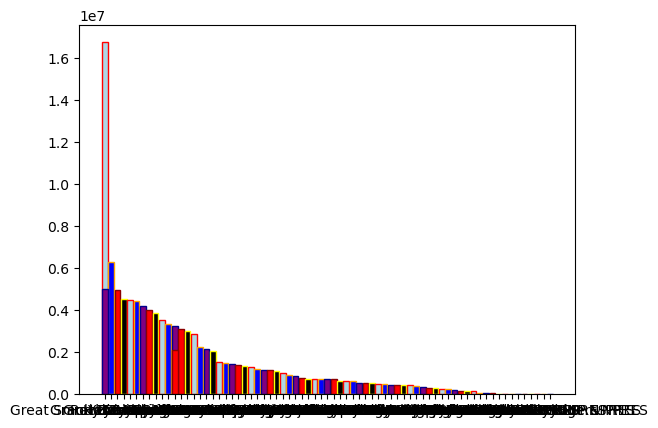

In [265]:
color = ['lightblue', 'blue', 'purple', 'red', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'darkred', 'yellow'] 


plt.bar(national_parks_2017_tv.park, national_parks_2017_tv.total_visitation, color = color, edgecolor = edgecolor, width=0.9, bottom=None, align='center')

In [266]:
competitors = national_parks.loc[national_parks['park'].isin(['Grand Canyon NP', 'Glacier NP', 'New River Gorge NP & PRES', 'Gates of the Arctic NP & PRES', 'Yosemite NP', 'Big Bend NP', 'Canyonlands NP', 'North Cascades NP', 'Glacier Bay NP & PRES', 'Great Smoky Mountains NP'])]
competitors

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
10,Alaska,Gates of the Arctic NP & PRES,11177,"13,144",0,157731,0,0,0,0,0,6355,0,0,2017,6355,11177,157731
11,Alaska,Glacier Bay NP & PRES,547057,"588,541",381,7062494,97380,12352,0,901,0,5986,4030,13267,2017,36536,547438,7159874
28,Arizona,Grand Canyon NP,6254238,"8,217,881",26158,98614576,26158,653927,"32,139",147320,70862,312503,0,29005,2017,1213617,6280396,98640734
75,California,Yosemite NP,4336890,"5,938,712",163654,71264549,4281972,826725,0,456476,293844,167507,0,26166,2017,1770718,4500544,75546521
210,Montana,Glacier NP,3305512,"2,989,321",15807,35871856,132038,109228,0,127661,111639,34011,0,880,2017,383419,3321319,36003894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Tennessee,Great Smoky Mountains NP,9307519,"3,045,896",10832000,36550759,5416000,10657,0,143788,112949,39770,0,20517,2024,327681,20139519,41966759
350,Texas,Big Bend NP,561458,"945,102",2700,11341233,8100,22479,"3,661",69606,27860,48597,0,19619,2024,188161,564158,11349333
364,Utah,Canyonlands NP,818492,"433,003",0,5196036,0,0,0,8509,10209,67957,0,1911,2024,88586,818492,5196036
406,Washington,North Cascades NP,16485,"25,522",0,306273,0,0,0,0,0,12948,0,0,2024,12948,16485,306273


In [267]:
competitors_new = national_parks.loc[national_parks['park'].isin(['Grand Canyon NP', 'Glacier NP', 'New River Gorge NP & PRES', 'Yosemite NP', 'Big Bend NP', 'Canyonlands NP','Glacier Bay NP & PRES'])]
competitors_new

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
11,Alaska,Glacier Bay NP & PRES,547057,"588,541",381,7062494,97380,12352,0,901,0,5986,4030,13267,2017,36536,547438,7159874
28,Arizona,Grand Canyon NP,6254238,"8,217,881",26158,98614576,26158,653927,"32,139",147320,70862,312503,0,29005,2017,1213617,6280396,98640734
75,California,Yosemite NP,4336890,"5,938,712",163654,71264549,4281972,826725,0,456476,293844,167507,0,26166,2017,1770718,4500544,75546521
210,Montana,Glacier NP,3305512,"2,989,321",15807,35871856,132038,109228,0,127661,111639,34011,0,880,2017,383419,3321319,36003894
329,Texas,Big Bend NP,440276,"917,120",2364,11005448,7092,44485,"8,204",65446,33529,42555,0,44203,2017,230218,442640,11012540
343,Utah,Canyonlands NP,742271,"447,941",0,5375294,0,0,0,13565,8519,82188,0,828,2017,105100,742271,5375294
393,West Virginia,New River Gorge NP & PRES,1168658,"212,460",2400,2549521,4800,0,0,4782,945,0,0,0,2017,5727,1171058,2554321
11,Alaska,Glacier Bay NP & PRES,597915,"641,941",644,7703301,95060,12475,0,783,0,5840,3845,17668,2018,40611,598559,7798361
28,Arizona,Grand Canyon NP,6380495,"8,375,563",23748,100506766,23748,663982,"38,829",139004,68000,337790,0,27947,2018,1236723,6404243,100530514
75,California,Yosemite NP,4009436,"4,960,791",151651,59529503,3837229,654272,0,354819,259748,124577,0,16667,2018,1410083,4161087,63366732


In [268]:
competitors_2017 = competitors.loc[competitors.year == 2017]
competitors_2017

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
10,Alaska,Gates of the Arctic NP & PRES,11177,"13,144",0,157731,0,0,0,0,0,6355,0,0,2017,6355,11177,157731
11,Alaska,Glacier Bay NP & PRES,547057,"588,541",381,7062494,97380,12352,0,901,0,5986,4030,13267,2017,36536,547438,7159874
28,Arizona,Grand Canyon NP,6254238,"8,217,881",26158,98614576,26158,653927,"32,139",147320,70862,312503,0,29005,2017,1213617,6280396,98640734
75,California,Yosemite NP,4336890,"5,938,712",163654,71264549,4281972,826725,0,456476,293844,167507,0,26166,2017,1770718,4500544,75546521
210,Montana,Glacier NP,3305512,"2,989,321",15807,35871856,132038,109228,0,127661,111639,34011,0,880,2017,383419,3321319,36003894
267,North Carolina,Great Smoky Mountains NP,4989115,"3,055,932",0,36671185,0,0,0,57964,37159,45914,0,8008,2017,149045,4989115,36671185
321,Tennessee,Great Smoky Mountains NP,6349780,"3,889,368",10396268,46672418,5198137,11160,0,102500,72938,58438,0,14277,2017,259313,16746048,51870555
329,Texas,Big Bend NP,440276,"917,120",2364,11005448,7092,44485,"8,204",65446,33529,42555,0,44203,2017,230218,442640,11012540
343,Utah,Canyonlands NP,742271,"447,941",0,5375294,0,0,0,13565,8519,82188,0,828,2017,105100,742271,5375294
385,Washington,North Cascades NP,30326,"50,600",0,607202,0,0,0,0,0,26081,0,0,2017,26081,30326,607202


In [269]:
competitors_2017_tv = competitors_2017.sort_values(by='total_visitation', ascending =False)
competitors_2017_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
321,Tennessee,Great Smoky Mountains NP,6349780,"3,889,368",10396268,46672418,5198137,11160,0,102500,72938,58438,0,14277,2017,259313,16746048,51870555
28,Arizona,Grand Canyon NP,6254238,"8,217,881",26158,98614576,26158,653927,"32,139",147320,70862,312503,0,29005,2017,1213617,6280396,98640734
267,North Carolina,Great Smoky Mountains NP,4989115,"3,055,932",0,36671185,0,0,0,57964,37159,45914,0,8008,2017,149045,4989115,36671185
75,California,Yosemite NP,4336890,"5,938,712",163654,71264549,4281972,826725,0,456476,293844,167507,0,26166,2017,1770718,4500544,75546521
210,Montana,Glacier NP,3305512,"2,989,321",15807,35871856,132038,109228,0,127661,111639,34011,0,880,2017,383419,3321319,36003894
393,West Virginia,New River Gorge NP & PRES,1168658,"212,460",2400,2549521,4800,0,0,4782,945,0,0,0,2017,5727,1171058,2554321
343,Utah,Canyonlands NP,742271,"447,941",0,5375294,0,0,0,13565,8519,82188,0,828,2017,105100,742271,5375294
11,Alaska,Glacier Bay NP & PRES,547057,"588,541",381,7062494,97380,12352,0,901,0,5986,4030,13267,2017,36536,547438,7159874
329,Texas,Big Bend NP,440276,"917,120",2364,11005448,7092,44485,"8,204",65446,33529,42555,0,44203,2017,230218,442640,11012540
385,Washington,North Cascades NP,30326,"50,600",0,607202,0,0,0,0,0,26081,0,0,2017,26081,30326,607202


In [270]:
competitors_2018 = competitors.loc[competitors.year == 2018]
competitors_2018

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
10,Alaska,Gates of the Arctic NP & PRES,9591,"15,479",0,185752,0,0,0,0,0,7561,0,0,2018,7561,9591,185752
11,Alaska,Glacier Bay NP & PRES,597915,"641,941",644,7703301,95060,12475,0,783,0,5840,3845,17668,2018,40611,598559,7798361
28,Arizona,Grand Canyon NP,6380495,"8,375,563",23748,100506766,23748,663982,"38,829",139004,68000,337790,0,27947,2018,1236723,6404243,100530514
75,California,Yosemite NP,4009436,"4,960,791",151651,59529503,3837229,654272,0,354819,259748,124577,0,16667,2018,1410083,4161087,63366732
210,Montana,Glacier NP,2965309,"2,684,277",13532,32211332,118373,107156,0,110507,109566,32349,0,1178,2018,360756,2978841,32329705
267,North Carolina,Great Smoky Mountains NP,5025330,"3,067,435",0,36809230,0,0,0,52531,38604,42939,0,7709,2018,141783,5025330,36809230
321,Tennessee,Great Smoky Mountains NP,6395874,"3,904,009",10544377,46848110,5272190,11163,0,99636,75045,54654,0,12396,2018,252894,16940251,52120300
329,Texas,Big Bend NP,440091,"862,797",2364,10353573,7092,48065,"13,060",55863,33209,23858,0,37299,2018,198294,442455,10360665
343,Utah,Canyonlands NP,739449,"441,816",0,5301793,0,0,0,13221,10517,78375,0,416,2018,102529,739449,5301793
385,Washington,North Cascades NP,30085,"51,381",0,616576,0,0,0,0,0,26703,0,0,2018,26703,30085,616576


In [271]:
competitors_2018_tv = competitors_2018.sort_values(by='total_visitation', ascending =False)
competitors_2018_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
321,Tennessee,Great Smoky Mountains NP,6395874,"3,904,009",10544377,46848110,5272190,11163,0,99636,75045,54654,0,12396,2018,252894,16940251,52120300
28,Arizona,Grand Canyon NP,6380495,"8,375,563",23748,100506766,23748,663982,"38,829",139004,68000,337790,0,27947,2018,1236723,6404243,100530514
267,North Carolina,Great Smoky Mountains NP,5025330,"3,067,435",0,36809230,0,0,0,52531,38604,42939,0,7709,2018,141783,5025330,36809230
75,California,Yosemite NP,4009436,"4,960,791",151651,59529503,3837229,654272,0,354819,259748,124577,0,16667,2018,1410083,4161087,63366732
210,Montana,Glacier NP,2965309,"2,684,277",13532,32211332,118373,107156,0,110507,109566,32349,0,1178,2018,360756,2978841,32329705
393,West Virginia,New River Gorge NP & PRES,1232627,"212,427",2400,2549126,4800,0,0,4872,999,0,0,0,2018,5871,1235027,2553926
343,Utah,Canyonlands NP,739449,"441,816",0,5301793,0,0,0,13221,10517,78375,0,416,2018,102529,739449,5301793
11,Alaska,Glacier Bay NP & PRES,597915,"641,941",644,7703301,95060,12475,0,783,0,5840,3845,17668,2018,40611,598559,7798361
329,Texas,Big Bend NP,440091,"862,797",2364,10353573,7092,48065,"13,060",55863,33209,23858,0,37299,2018,198294,442455,10360665
385,Washington,North Cascades NP,30085,"51,381",0,616576,0,0,0,0,0,26703,0,0,2018,26703,30085,616576


In [272]:
competitors_2019 = competitors.loc[competitors.year == 2019]
competitors_2019

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
10,Alaska,Gates of the Arctic NP & PRES,10518,"8,530",0,102366,0,0,0,0,0,4058,0,0,2019,4058,10518,102366
11,Alaska,Glacier Bay NP & PRES,672087,"713,718",489,8564620,70700,14408,0,744,0,4211,2840,14938,2019,37141,672576,8635320
28,Arizona,Grand Canyon NP,5974411,"7,832,927",21249,93995133,21249,575922,"47,401",120208,63565,320032,0,25201,2019,1104928,5995660,94016382
75,California,Yosemite NP,4422861,"5,459,047",163602,65508566,4139502,682273,0,469585,211948,155578,0,30411,2019,1549795,4586463,69648068
210,Montana,Glacier NP,3049839,"2,831,656",13103,33979881,113622,119960,0,118181,126099,34759,0,926,2019,399925,3062942,34093503
267,North Carolina,Great Smoky Mountains NP,5521007,"3,344,131",0,40129575,0,0,0,49925,36817,41611,0,8143,2019,136496,5521007,40129575
321,Tennessee,Great Smoky Mountains NP,7026734,"4,256,167",10544367,51074007,5272185,10955,0,105483,76723,52958,0,10685,2019,256804,17571101,56346192
329,Texas,Big Bend NP,463832,"874,696",2364,10496353,7092,49227,"12,618",54402,28845,23320,0,37020,2019,192814,466196,10503445
343,Utah,Canyonlands NP,733996,"429,395",0,5152749,0,0,0,9135,7785,77695,0,508,2019,95123,733996,5152749
385,Washington,North Cascades NP,38208,"56,050",0,672611,0,0,0,0,0,27581,0,0,2019,27581,38208,672611


In [273]:
competitors_2019_tv = competitors_2019.sort_values(by='total_visitation', ascending =False)
competitors_2019_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
321,Tennessee,Great Smoky Mountains NP,7026734,"4,256,167",10544367,51074007,5272185,10955,0,105483,76723,52958,0,10685,2019,256804,17571101,56346192
28,Arizona,Grand Canyon NP,5974411,"7,832,927",21249,93995133,21249,575922,"47,401",120208,63565,320032,0,25201,2019,1104928,5995660,94016382
267,North Carolina,Great Smoky Mountains NP,5521007,"3,344,131",0,40129575,0,0,0,49925,36817,41611,0,8143,2019,136496,5521007,40129575
75,California,Yosemite NP,4422861,"5,459,047",163602,65508566,4139502,682273,0,469585,211948,155578,0,30411,2019,1549795,4586463,69648068
210,Montana,Glacier NP,3049839,"2,831,656",13103,33979881,113622,119960,0,118181,126099,34759,0,926,2019,399925,3062942,34093503
393,West Virginia,New River Gorge NP & PRES,1195721,"217,982",2400,2615787,4800,0,0,5074,1032,0,0,0,2019,6106,1198121,2620587
343,Utah,Canyonlands NP,733996,"429,395",0,5152749,0,0,0,9135,7785,77695,0,508,2019,95123,733996,5152749
11,Alaska,Glacier Bay NP & PRES,672087,"713,718",489,8564620,70700,14408,0,744,0,4211,2840,14938,2019,37141,672576,8635320
329,Texas,Big Bend NP,463832,"874,696",2364,10496353,7092,49227,"12,618",54402,28845,23320,0,37020,2019,192814,466196,10503445
385,Washington,North Cascades NP,38208,"56,050",0,672611,0,0,0,0,0,27581,0,0,2019,27581,38208,672611


In [274]:
competitors_2020 = competitors.loc[competitors.year == 2020]
competitors_2020

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
10,Alaska,Gates of the Arctic NP & PRES,2872,"2,279",0,27355,0,0,0,0,0,1086,0,0,2020,1086,2872,27355
11,Alaska,Glacier Bay NP & PRES,5748,"19,668",203,236016,48200,0,0,94,0,989,1990,8345,2020,11418,5951,284216
28,Arizona,Grand Canyon NP,2897098,"3,734,023",14788,44808278,14788,218922,"31,276",17331,6338,177589,0,497,2020,420677,2911886,44823066
75,California,Yosemite NP,2268313,"2,131,938",92498,25583263,2432384,252374,0,68002,44496,143760,0,0,2020,508632,2360811,28015647
213,Montana,Glacier NP,1698864,"1,325,800",0,15909600,0,34029,0,18635,17733,16596,0,0,2020,86993,1698864,15909600
272,North Carolina,Great Smoky Mountains NP,5322116,"3,210,200",0,38522400,0,0,0,53106,41833,39552,0,0,2020,134491,5322116,38522400
326,Tennessee,Great Smoky Mountains NP,6773604,"4,085,709",10544367,49028509,5272185,8083,0,91385,73734,50340,0,120,2020,223662,17317971,54300694
334,Texas,Big Bend NP,393907,"648,754",2364,7785058,7092,15534,"4,866",32197,26952,28219,0,19655,2020,122557,396271,7792150
348,Utah,Canyonlands NP,493914,"298,882",0,3586585,0,0,0,5606,4413,59800,0,160,2020,69979,493914,3586585
390,Washington,North Cascades NP,30885,"46,296",0,555560,0,0,0,0,0,22966,0,0,2020,22966,30885,555560


In [275]:
competitors_2020_tv = competitors_2020.sort_values(by='total_visitation', ascending =False)
competitors_2020_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
326,Tennessee,Great Smoky Mountains NP,6773604,"4,085,709",10544367,49028509,5272185,8083,0,91385,73734,50340,0,120,2020,223662,17317971,54300694
272,North Carolina,Great Smoky Mountains NP,5322116,"3,210,200",0,38522400,0,0,0,53106,41833,39552,0,0,2020,134491,5322116,38522400
28,Arizona,Grand Canyon NP,2897098,"3,734,023",14788,44808278,14788,218922,"31,276",17331,6338,177589,0,497,2020,420677,2911886,44823066
75,California,Yosemite NP,2268313,"2,131,938",92498,25583263,2432384,252374,0,68002,44496,143760,0,0,2020,508632,2360811,28015647
213,Montana,Glacier NP,1698864,"1,325,800",0,15909600,0,34029,0,18635,17733,16596,0,0,2020,86993,1698864,15909600
398,West Virginia,New River Gorge NP & PRES,1054374,"229,489",2400,2753877,4800,0,0,815,250,0,0,0,2020,1065,1056774,2758677
348,Utah,Canyonlands NP,493914,"298,882",0,3586585,0,0,0,5606,4413,59800,0,160,2020,69979,493914,3586585
334,Texas,Big Bend NP,393907,"648,754",2364,7785058,7092,15534,"4,866",32197,26952,28219,0,19655,2020,122557,396271,7792150
390,Washington,North Cascades NP,30885,"46,296",0,555560,0,0,0,0,0,22966,0,0,2020,22966,30885,555560
11,Alaska,Glacier Bay NP & PRES,5748,"19,668",203,236016,48200,0,0,94,0,989,1990,8345,2020,11418,5951,284216


In [276]:
competitors_2021 = competitors.loc[competitors.year == 2021]
competitors_2021

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
11,Alaska,Gates of the Arctic NP & PRES,7362,"3,540",0,42489,0,0,0,0,0,1632,0,0,2021,1632,7362,42489
12,Alaska,Glacier Bay NP & PRES,89768,"133,925",494,1607101,109050,18575,0,813,0,3445,4470,8858,2021,36161,90262,1716151
29,Arizona,Grand Canyon NP,4532677,"5,927,482",18243,71129791,18243,393531,"38,293",119531,55661,332295,0,7991,2021,909009,4550920,71148034
76,California,Yosemite NP,3287595,"3,855,932",133622,46271187,3465801,550098,0,188179,149192,174839,0,3164,2021,1065472,3421217,49736988
217,Montana,Glacier NP,3081656,"2,554,990",7986,30659891,67084,54510,0,81037,85365,33548,0,4497,2021,258957,3089642,30726975
277,North Carolina,Great Smoky Mountains NP,6231083,"3,797,710",0,45572529,0,0,0,64012,55626,47337,0,8174,2021,175149,6231083,45572529
331,Tennessee,Great Smoky Mountains NP,7930467,"4,833,450",10141683,58001400,5070842,10542,0,127419,95732,60244,0,11390,2021,305327,18072150,63072242
339,Texas,Big Bend NP,581220,"918,280",2364,11019363,7092,16985,"4,146",48224,24688,29692,0,44795,2021,164384,583584,11026455
353,Utah,Canyonlands NP,911594,"511,088",0,6133064,0,0,0,9517,7744,90466,0,1117,2021,108844,911594,6133064
395,Washington,North Cascades NP,17855,"28,155",0,337862,0,0,0,0,0,14020,0,0,2021,14020,17855,337862


In [277]:
competitors_2021_tv = competitors_2021.sort_values(by='total_visitation', ascending =False)
competitors_2021_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
331,Tennessee,Great Smoky Mountains NP,7930467,"4,833,450",10141683,58001400,5070842,10542,0,127419,95732,60244,0,11390,2021,305327,18072150,63072242
277,North Carolina,Great Smoky Mountains NP,6231083,"3,797,710",0,45572529,0,0,0,64012,55626,47337,0,8174,2021,175149,6231083,45572529
29,Arizona,Grand Canyon NP,4532677,"5,927,482",18243,71129791,18243,393531,"38,293",119531,55661,332295,0,7991,2021,909009,4550920,71148034
76,California,Yosemite NP,3287595,"3,855,932",133622,46271187,3465801,550098,0,188179,149192,174839,0,3164,2021,1065472,3421217,49736988
217,Montana,Glacier NP,3081656,"2,554,990",7986,30659891,67084,54510,0,81037,85365,33548,0,4497,2021,258957,3089642,30726975
403,West Virginia,New River Gorge NP & PRES,1682720,"358,421",2400,4301053,4800,0,0,15550,11214,12609,0,1454,2021,40827,1685120,4305853
353,Utah,Canyonlands NP,911594,"511,088",0,6133064,0,0,0,9517,7744,90466,0,1117,2021,108844,911594,6133064
339,Texas,Big Bend NP,581220,"918,280",2364,11019363,7092,16985,"4,146",48224,24688,29692,0,44795,2021,164384,583584,11026455
12,Alaska,Glacier Bay NP & PRES,89768,"133,925",494,1607101,109050,18575,0,813,0,3445,4470,8858,2021,36161,90262,1716151
395,Washington,North Cascades NP,17855,"28,155",0,337862,0,0,0,0,0,14020,0,0,2021,14020,17855,337862


In [278]:
competitors_2022 = competitors.loc[competitors.year == 2022]
competitors_2022

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
11,Alaska,Gates of the Arctic NP & PRES,9457,"8,398",0,100785,0,0,0,0,0,4017,0,0,2022,4017,9457,100785
12,Alaska,Glacier Bay NP & PRES,545758,"584,688",545,7016261,121480,15554,0,724,0,3741,5020,8839,2022,33878,546303,7137741
29,Arizona,Grand Canyon NP,4732101,"6,182,077",7720,74184926,7720,526467,"39,400",89825,56759,331623,0,14141,2022,1018815,4739821,74192646
76,California,Yosemite NP,3667550,"4,747,027",144769,56964329,3708989,644508,0,349888,220100,142457,0,22568,2022,1379521,3812319,60673318
217,Montana,Glacier NP,2908458,"2,608,052",13835,31296627,114065,110380,0,90422,112485,28261,0,6788,2022,348336,2922293,31410692
277,North Carolina,Great Smoky Mountains NP,5692558,"3,520,025",0,42240305,0,0,0,70127,50931,42577,0,19560,2022,183195,5692558,42240305
332,Tennessee,Great Smoky Mountains NP,7245076,"4,480,032",10832000,53760386,5416000,10461,0,142965,107819,54185,0,19077,2022,334507,18077076,59176386
340,Texas,Big Bend NP,514107,"777,736",2700,9332836,8100,18184,"3,213",26609,20415,55173,0,8221,2022,128602,516807,9340936
354,Utah,Canyonlands NP,779147,"443,852",0,5326230,0,0,0,7500,7955,80264,0,2019,2022,97738,779147,5326230
396,Washington,North Cascades NP,30154,"46,994",0,563931,0,0,0,0,0,23310,0,0,2022,23310,30154,563931


In [279]:
competitors_2022_tv = competitors_2022.sort_values(by='total_visitation', ascending =False)
competitors_2022_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
332,Tennessee,Great Smoky Mountains NP,7245076,"4,480,032",10832000,53760386,5416000,10461,0,142965,107819,54185,0,19077,2022,334507,18077076,59176386
277,North Carolina,Great Smoky Mountains NP,5692558,"3,520,025",0,42240305,0,0,0,70127,50931,42577,0,19560,2022,183195,5692558,42240305
29,Arizona,Grand Canyon NP,4732101,"6,182,077",7720,74184926,7720,526467,"39,400",89825,56759,331623,0,14141,2022,1018815,4739821,74192646
76,California,Yosemite NP,3667550,"4,747,027",144769,56964329,3708989,644508,0,349888,220100,142457,0,22568,2022,1379521,3812319,60673318
217,Montana,Glacier NP,2908458,"2,608,052",13835,31296627,114065,110380,0,90422,112485,28261,0,6788,2022,348336,2922293,31410692
404,West Virginia,New River Gorge NP & PRES,1593523,"347,146",2400,4165760,4800,0,0,16061,9963,12530,0,3007,2022,41561,1595923,4170560
354,Utah,Canyonlands NP,779147,"443,852",0,5326230,0,0,0,7500,7955,80264,0,2019,2022,97738,779147,5326230
12,Alaska,Glacier Bay NP & PRES,545758,"584,688",545,7016261,121480,15554,0,724,0,3741,5020,8839,2022,33878,546303,7137741
340,Texas,Big Bend NP,514107,"777,736",2700,9332836,8100,18184,"3,213",26609,20415,55173,0,8221,2022,128602,516807,9340936
396,Washington,North Cascades NP,30154,"46,994",0,563931,0,0,0,0,0,23310,0,0,2022,23310,30154,563931


In [280]:
competitors_2023 = competitors.loc[competitors.year == 2023]
competitors_2023

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
11,Alaska,Gates of the Arctic NP & PRES,11045,"8,438",0,101256,0,0,0,0,0,4000,0,0,2023,4000,11045,101256
12,Alaska,Glacier Bay NP & PRES,703659,"739,098",458,8869184,96100,12354,0,669,0,3648,3960,9518,2023,30149,704117,8965284
29,Arizona,Grand Canyon NP,4733705,"6,171,077",12533,74052927,12533,530029,"37,380",159019,84332,299725,0,27290,2023,1100395,4746238,74065460
77,California,Yosemite NP,3897070,"4,338,091",160167,52057099,4245429,565644,0,275278,196092,103997,0,22266,2023,1163277,4057237,56302528
222,Montana,Glacier NP,2933616,"2,728,321",2644,32739858,22876,114718,0,132219,132336,32074,0,10879,2023,422226,2936260,32762734
282,North Carolina,Great Smoky Mountains NP,5850966,"3,596,399",0,43156797,0,0,0,68105,50138,37193,0,19162,2023,174598,5850966,43156797
338,Tennessee,Great Smoky Mountains NP,7446682,"4,577,236",10832000,54926832,5416000,10373,0,138965,108073,47339,0,19134,2023,323884,18278682,60342832
346,Texas,Big Bend NP,509129,"798,831",2700,9585981,8100,22346,"3,695",23647,27175,58919,0,9069,2023,141156,511829,9594081
360,Utah,Canyonlands NP,800322,"424,735",0,5096820,0,0,0,8136,8790,68953,0,1721,2023,87600,800322,5096820
402,Washington,North Cascades NP,40351,"44,320",0,531844,0,0,0,0,0,19125,0,0,2023,19125,40351,531844


In [281]:
competitors_2023_tv = competitors_2023.sort_values(by='total_visitation', ascending =False)
competitors_2023_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
338,Tennessee,Great Smoky Mountains NP,7446682,"4,577,236",10832000,54926832,5416000,10373,0,138965,108073,47339,0,19134,2023,323884,18278682,60342832
282,North Carolina,Great Smoky Mountains NP,5850966,"3,596,399",0,43156797,0,0,0,68105,50138,37193,0,19162,2023,174598,5850966,43156797
29,Arizona,Grand Canyon NP,4733705,"6,171,077",12533,74052927,12533,530029,"37,380",159019,84332,299725,0,27290,2023,1100395,4746238,74065460
77,California,Yosemite NP,3897070,"4,338,091",160167,52057099,4245429,565644,0,275278,196092,103997,0,22266,2023,1163277,4057237,56302528
222,Montana,Glacier NP,2933616,"2,728,321",2644,32739858,22876,114718,0,132219,132336,32074,0,10879,2023,422226,2936260,32762734
410,West Virginia,New River Gorge NP & PRES,1707223,"370,597",2400,4447173,4800,0,0,17214,10501,12609,0,4013,2023,44337,1709623,4451973
360,Utah,Canyonlands NP,800322,"424,735",0,5096820,0,0,0,8136,8790,68953,0,1721,2023,87600,800322,5096820
12,Alaska,Glacier Bay NP & PRES,703659,"739,098",458,8869184,96100,12354,0,669,0,3648,3960,9518,2023,30149,704117,8965284
346,Texas,Big Bend NP,509129,"798,831",2700,9585981,8100,22346,"3,695",23647,27175,58919,0,9069,2023,141156,511829,9594081
402,Washington,North Cascades NP,40351,"44,320",0,531844,0,0,0,0,0,19125,0,0,2023,19125,40351,531844


In [282]:
competitors_2024 = competitors.loc[competitors.year == 2024]
competitors_2024

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
11,Alaska,Gates of the Arctic NP & PRES,11907,"7,611",0,91332,0,0,0,0,0,3577,0,0,2024,3577,11907,91332
12,Alaska,Glacier Bay NP & PRES,736282,"774,047",771,9288569,165480,13748,0,773,0,3710,6820,12268,2024,37319,737053,9454049
29,Arizona,Grand Canyon NP,4919163,"6,423,732",21010,77084784,21010,629148,"74,657",105154,60069,291787,0,15097,2024,1101255,4940173,77105794
77,California,Yosemite NP,4121807,"5,016,295",163922,60195540,4264527,698400,0,356089,211216,131571,0,16528,2024,1413804,4285729,64460067
226,Montana,Glacier NP,3208755,"2,920,641",3058,35047693,26772,118588,0,126200,129858,34828,0,11309,2024,420783,3211813,35074465
286,North Carolina,Great Smoky Mountains NP,2884314,"945,676",0,11348115,0,0,0,61966,63524,31249,0,17382,2024,174121,2884314,11348115
342,Tennessee,Great Smoky Mountains NP,9307519,"3,045,896",10832000,36550759,5416000,10657,0,143788,112949,39770,0,20517,2024,327681,20139519,41966759
350,Texas,Big Bend NP,561458,"945,102",2700,11341233,8100,22479,"3,661",69606,27860,48597,0,19619,2024,188161,564158,11349333
364,Utah,Canyonlands NP,818492,"433,003",0,5196036,0,0,0,8509,10209,67957,0,1911,2024,88586,818492,5196036
406,Washington,North Cascades NP,16485,"25,522",0,306273,0,0,0,0,0,12948,0,0,2024,12948,16485,306273


In [283]:
competitors_2024_tv = competitors_2024.sort_values(by='total_visitation', ascending =False)
competitors_2024_tv

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
342,Tennessee,Great Smoky Mountains NP,9307519,"3,045,896",10832000,36550759,5416000,10657,0,143788,112949,39770,0,20517,2024,327681,20139519,41966759
29,Arizona,Grand Canyon NP,4919163,"6,423,732",21010,77084784,21010,629148,"74,657",105154,60069,291787,0,15097,2024,1101255,4940173,77105794
77,California,Yosemite NP,4121807,"5,016,295",163922,60195540,4264527,698400,0,356089,211216,131571,0,16528,2024,1413804,4285729,64460067
226,Montana,Glacier NP,3208755,"2,920,641",3058,35047693,26772,118588,0,126200,129858,34828,0,11309,2024,420783,3211813,35074465
286,North Carolina,Great Smoky Mountains NP,2884314,"945,676",0,11348115,0,0,0,61966,63524,31249,0,17382,2024,174121,2884314,11348115
414,West Virginia,New River Gorge NP & PRES,1811937,"389,227",2400,4670726,4800,0,0,17157,10516,12609,0,3486,2024,43768,1814337,4675526
364,Utah,Canyonlands NP,818492,"433,003",0,5196036,0,0,0,8509,10209,67957,0,1911,2024,88586,818492,5196036
12,Alaska,Glacier Bay NP & PRES,736282,"774,047",771,9288569,165480,13748,0,773,0,3710,6820,12268,2024,37319,737053,9454049
350,Texas,Big Bend NP,561458,"945,102",2700,11341233,8100,22479,"3,661",69606,27860,48597,0,19619,2024,188161,564158,11349333
406,Washington,North Cascades NP,16485,"25,522",0,306273,0,0,0,0,0,12948,0,0,2024,12948,16485,306273


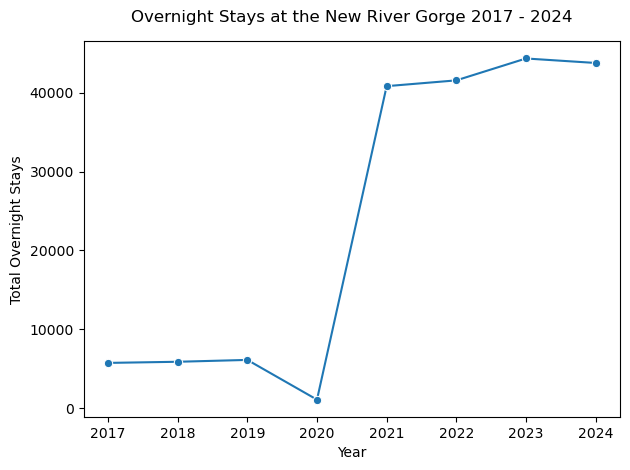

In [284]:
sns.lineplot(x='year', y='total_overnight_stays', data=nrg, marker='o')

plt.xlabel('Year')
plt.ylabel('Total Overnight Stays')
plt.title('Overnight Stays at the New River Gorge 2017 - 2024', y=1.03)

plt.tight_layout()

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15260\4046177121.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total_overnight_stays', data=nrg, palette='YlGnBu')


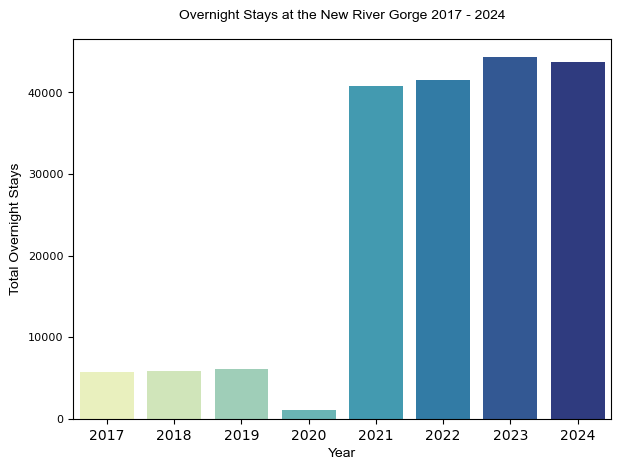

In [285]:
sns.barplot(x='year', y='total_overnight_stays', data=nrg, palette='YlGnBu')

plt.xlabel('Year', font='Arial')
plt.ylabel('Total Overnight Stays', font='Arial')
plt.title('Overnight Stays at the New River Gorge 2017 - 2024', y=1.03, font = 'Arial')

plt.tight_layout()

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

In 2022, New River Gorge National Park offered several promotions, including discounted rates for rafting trips, free rafting for kids under 12, and a "4th night free" lodging offer for staying at ACE Adventure Resort cabins or campgrounds. They also had a raft + zip samplers package, a Gauley savings deal, and "terrific weekday deals" with buy one, get one half price on single-day trips. Additionally, they offered zip lining adventures and "spring whitewater rafting specials. [1, 2]  
Here's a more detailed look at the 2022 promotions: 

• Rafting Discounts: ACE Adventure Resort offered up to 40% off rafting trips on the Lower New, Lower Gauley, and Upper Gauley rivers, as well as other adventures. 
• Free Rafting for Kids: Kids ages 6-11 could raft for free with a paying adult on the Upper New River. 
• 4th Night Free Lodging: Guests staying at ACE Adventure Resort cabins or campgrounds for three consecutive nights could get the fourth night free. 
• Raft + Zip Sampler Package: This package included a morning raft trip on the Lower New River Gorge and an afternoon zipline tour for $139 per person. 
• Gauley Savings: In September and October, on Mondays only, buy one Gauley river single day trip and get one half off. 
• Terrific Weekday Deals: Tuesday, Wednesday, and Thursday offered buy one, get one half price on New River single-day trips. 
• Ziplining Adventures: Visitors could experience the thrill of flying through the air on the "The Ridges Zipline Course". 
• Spring Whitewater Rafting Specials: ACE Adventure Resort had special rafting deals all spring long, starting as low as $79. [1, 2]  

[1] https://raftinginfo.com/events-specials/[2] https://aceraft.com/2024/01/12/ways-to-save-on-your-new-river-gorge-national-park-vacation/


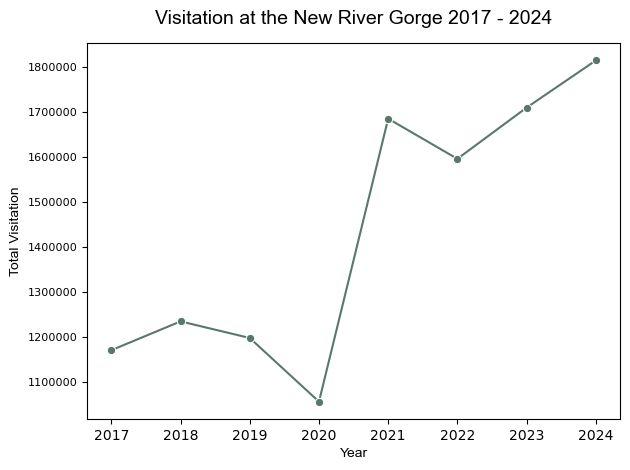

In [286]:
sns.lineplot(x='year', y='total_visitation', color = '#58796a', data=nrg, marker='o')

plt.xlabel('Year', font='Arial')
plt.ylabel('Total Visitation', font='Arial')
plt.title('Visitation at the New River Gorge 2017 - 2024', y=1.03, font='Arial', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()

In [287]:
#This national historic site was designated as a National Park in 2022 so I thought it might have impacted visitation in 2022 but
# it doesn't have any data for 2022 and doesn't have enough visitation in 2024 to really impact NRG visitation.

amache_np = df_merged.loc[df_merged.park.str.contains('Amache')]
amache_np

,state,park,recreation_visitors,recreation_visitor_days,non_recreation_visitors,recreation_visitor_hours,non_recreation_visitor_hours,concessioner_lodging_overnights,concessioner_camping_overnights,tent_overnights,recreation_vehicle_overnights,back_country_overnights,non_recreation_overnights,misc_overnights,year,total_overnight_stays,total_visitation,total_hours_visited
78,Colorado,Amache NHS,4771,397,336,4771,978,0,0,0,0,0,0,0,2024,0,5107,5749


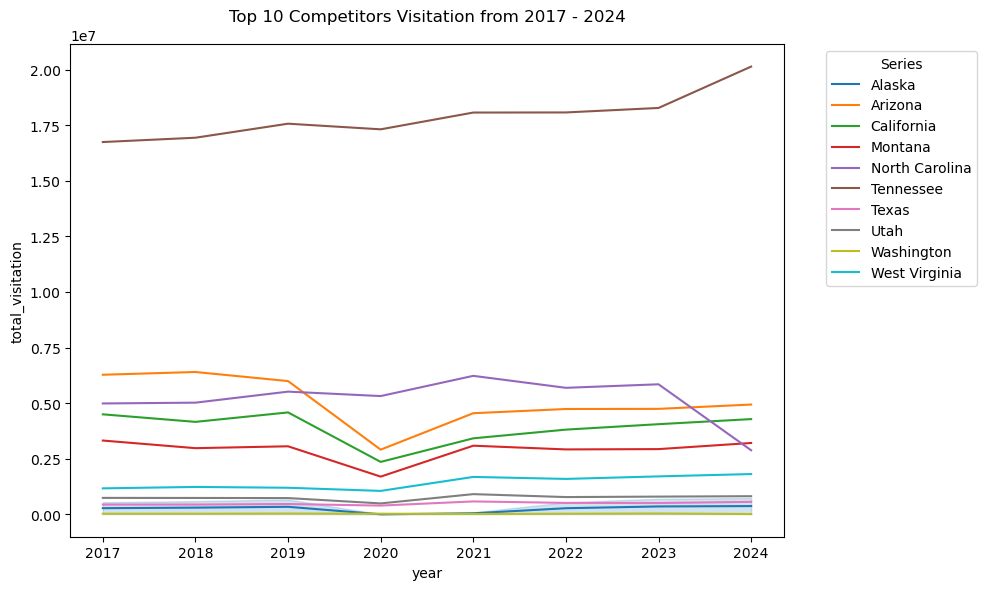

In [288]:
# I want to see visitation by year across all our competeing national parks. Can I do this by creating a line based  off of y = each park and x= year

plt.figure(figsize=(10, 6))
sns.lineplot(data=competitors, x='year', y='total_visitation', hue='state', palette='tab10')
plt.title('Top 10 Competitors Visitation from 2017 - 2024', y=1.03)
plt.legend(title='Series', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

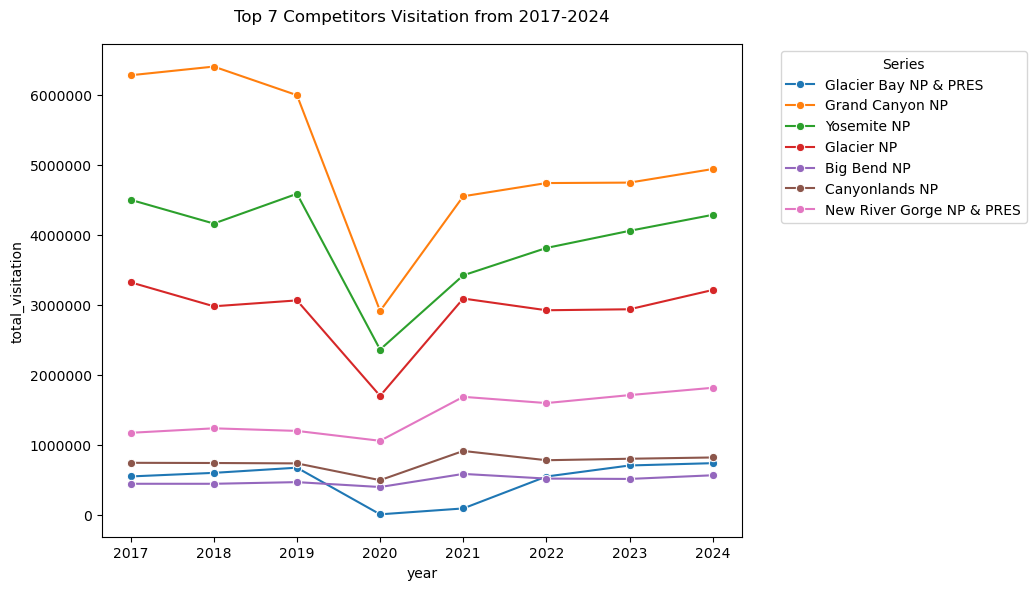

In [289]:
# I want to see visitation by year across all our competeing national parks. Can I do this by creating a line based  off of y = each park and x= year

plt.figure(figsize=(10, 6))
sns.lineplot(data=competitors_new, x='year', y='total_visitation', hue='park', palette='tab10', marker = 'o')
plt.title('Top 7 Competitors Visitation from 2017-2024', y=1.03)
plt.legend(title='Series', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

In 2022, Yosemite National Park and its surrounding areas offered various promotions and deals, including a "third night free" offer at Yosemite Valley Lodge, a free shuttle service within Yosemite Valley, and general travel planning tips for the year. Their shuttle had also been broken down and was brought back into function in 2022.

https://www.yosemite.com/2022-yosemite-news/

Glacier Bay worked on becoming ' the most accessible '  National Park offering overnight packages at their Bed & Breakfast. "The vast majority of Glacier Bay visitors travel by water, providing one of the most accessible national park experiences in Alaska. Most visitors never go ashore, visiting on cruise ships, where economies of scale and evolving technology contribute to reduced impacts per visitor." 

https://www.nps.gov/glba/learn/news/glacier-bay-sets-visitation-record-in-2023.htm

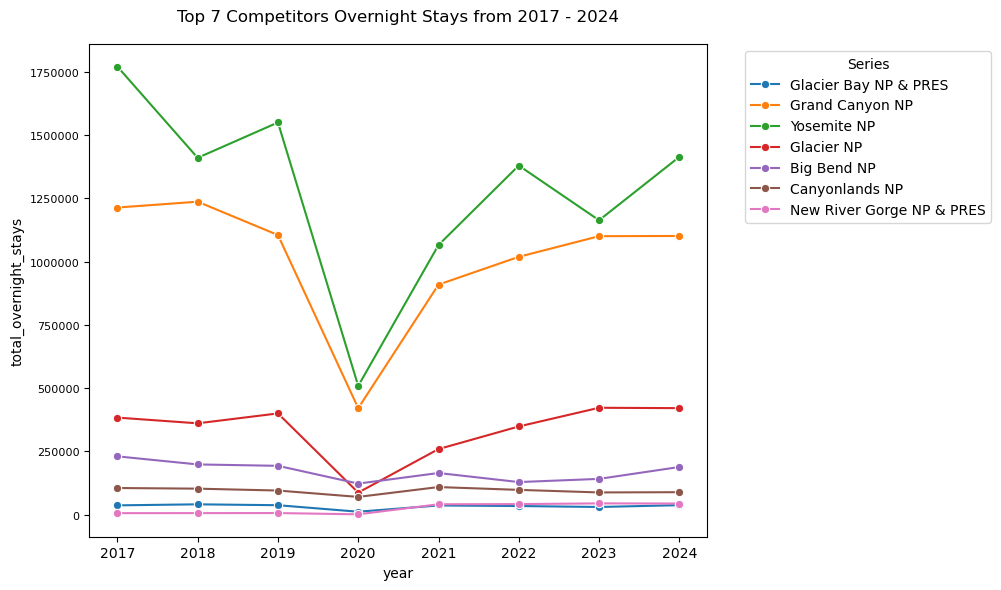

In [290]:
# I want to see visitation by year across all our competeing national parks. Can I do this by creating a line based  off of y = each park and x= year

plt.figure(figsize=(10, 6))
sns.lineplot(data=competitors_new, x='year', y='total_overnight_stays', hue='park', palette='tab10', marker = 'o')
plt.title('Top 7 Competitors Overnight Stays from 2017 - 2024', y=1.03)
plt.legend(title='Series', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

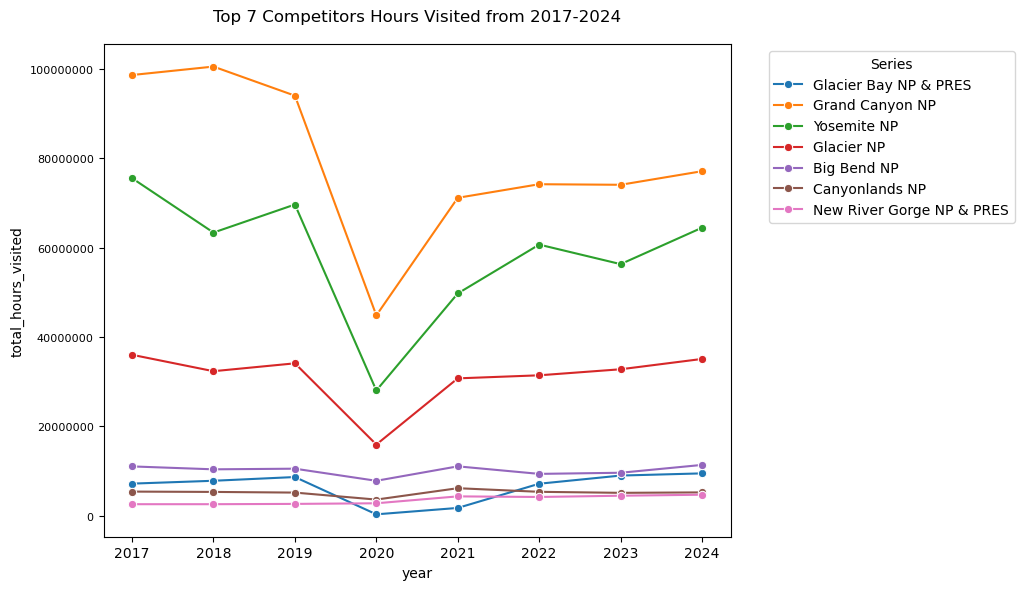

In [291]:
# I want to see visitation by year across all our competeing national parks. Can I do this by creating a line based  off of y = each park and x= year

plt.figure(figsize=(10, 6))
sns.lineplot(data=competitors_new, x='year', y='total_hours_visited', hue='park', palette='tab10', marker = 'o')
plt.title('Top 7 Competitors Hours Visited from 2017-2024', y=1.03)
plt.legend(title='Series', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

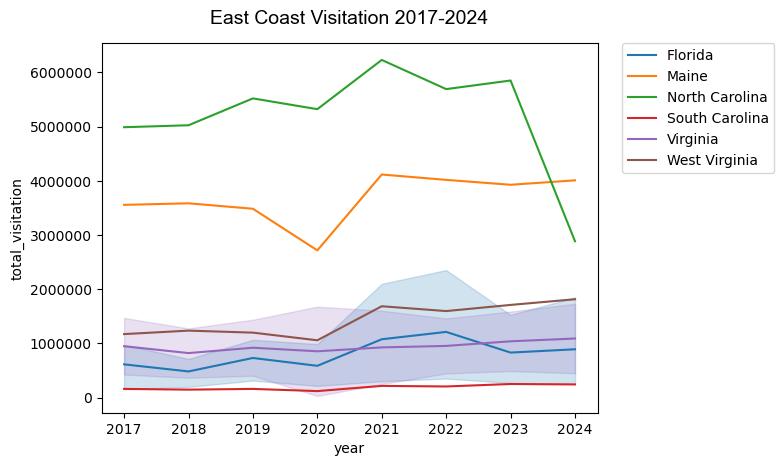

In [292]:
ax = sns.lineplot(data=east_coast_np, x='year', y='total_visitation', hue='state')

sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1))

plt.title('East Coast Visitation 2017-2024', y=1.03, font = 'Arial', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

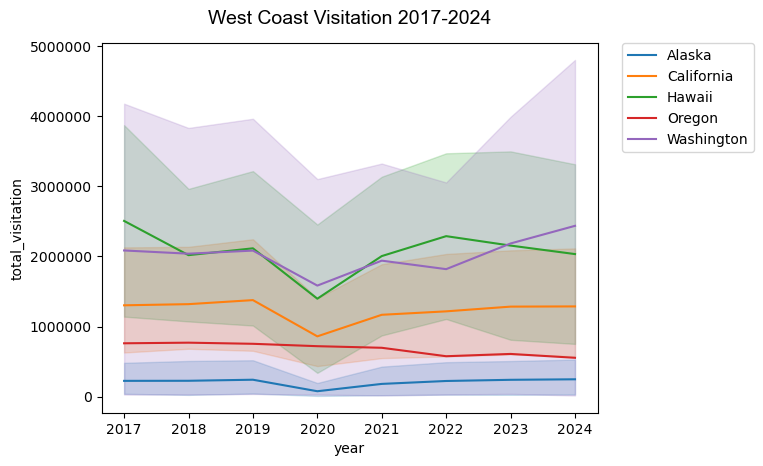

In [293]:
ax = sns.lineplot(data=west_coast_np, x='year', y='total_visitation', hue='state')

sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1))

plt.title('West Coast Visitation 2017-2024', y=1.03, font = 'Arial', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

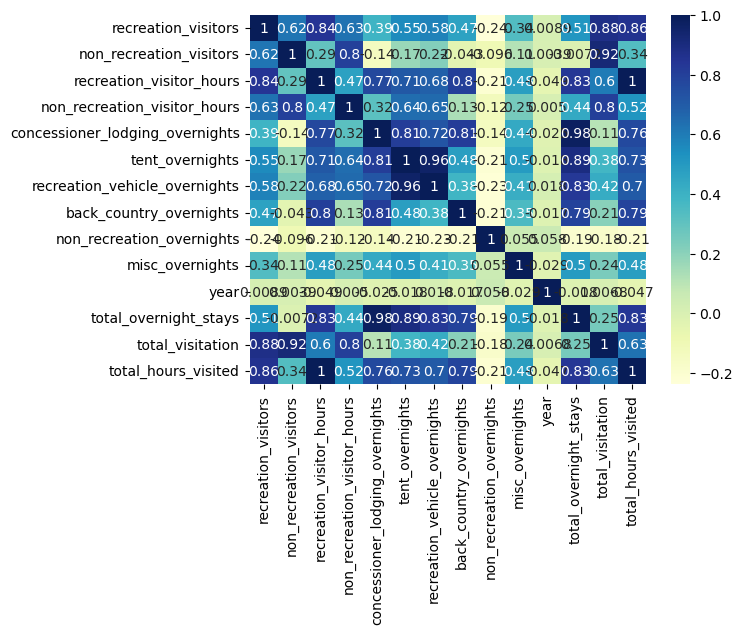

In [294]:
competitor_corr = competitors.corr(numeric_only=True)

sns.heatmap(competitor_corr, cmap="YlGnBu", annot=True)

plt.show()

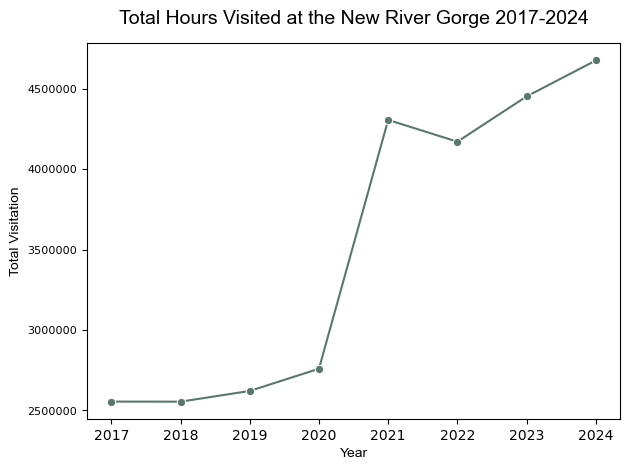

In [295]:
sns.lineplot(x='year', y='total_hours_visited', color = '#58796a', data=nrg, marker='o')

plt.xlabel('Year', font='Arial')
plt.ylabel('Total Visitation', font='Arial')
plt.title('Total Hours Visited at the New River Gorge 2017-2024', y=1.03, font='Arial', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()

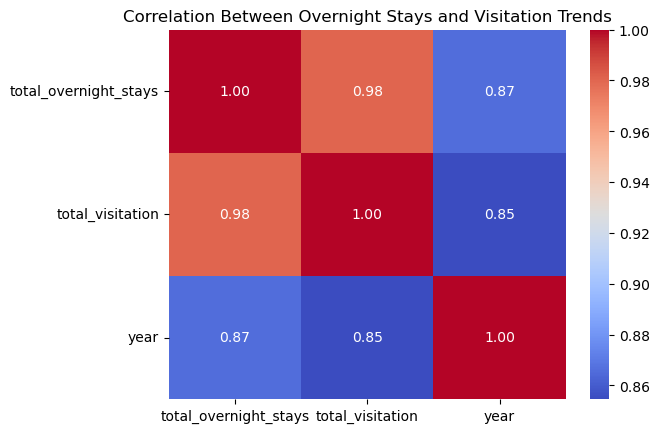

In [296]:
selected_columns = nrg[['total_overnight_stays', 'total_visitation', 'year']]

# Compute and plot the correlation matrix
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Overnight Stays and Visitation Trends")
plt.show()

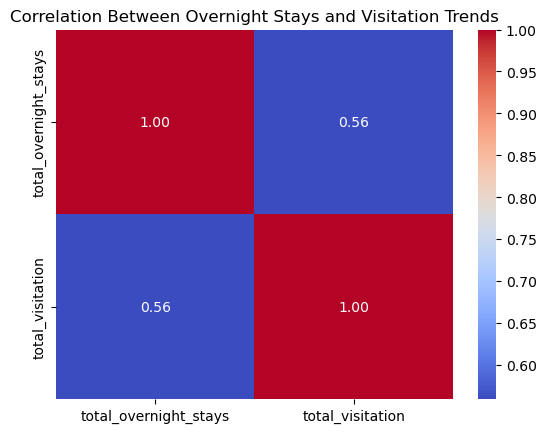

In [297]:
selected_columns = east_coast_np[['total_overnight_stays', 'total_visitation']]

# Compute and plot the correlation matrix
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Overnight Stays and Visitation Trends")
plt.show()

<Figure size 1000x600 with 0 Axes>

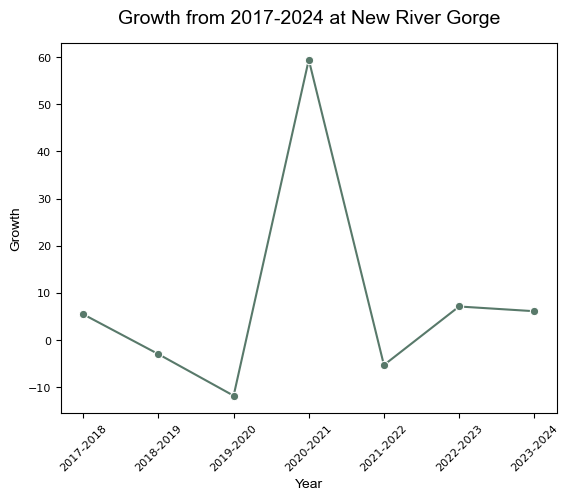

<Figure size 1000x600 with 0 Axes>

In [298]:
sns.lineplot(x='year', y='growth', color = '#58796a', data=nrg_grow, marker='o')

plt.xticks(rotation=45)

plt.xlabel('Year', font='Arial')
plt.ylabel('Growth', font='Arial')
plt.title('Growth from 2017-2024 at New River Gorge', y=1.03, font='Arial', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.figure(figsize=(10,6))

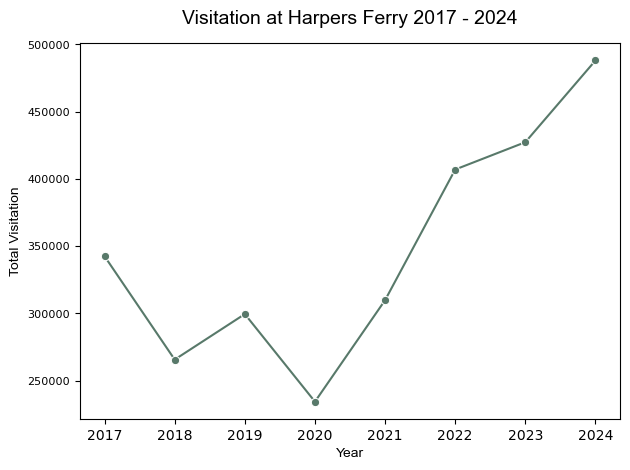

In [299]:
sns.lineplot(x='year', y='total_visitation', color = '#58796a', data=hrpferry, marker='o')

plt.xlabel('Year', font='Arial')
plt.ylabel('Total Visitation', font='Arial')
plt.title('Visitation at Harpers Ferry 2017 - 2024', y=1.03, font='Arial', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()

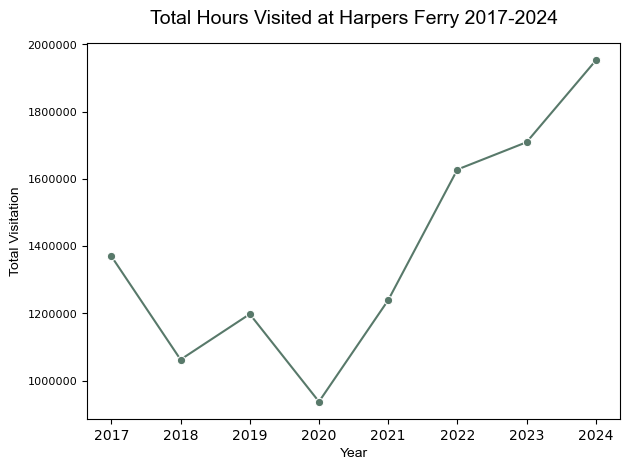

In [300]:
sns.lineplot(x='year', y='total_hours_visited', color = '#58796a', data=hrpferry, marker='o')

plt.xlabel('Year', font='Arial')
plt.ylabel('Total Visitation', font='Arial')
plt.title('Total Hours Visited at Harpers Ferry 2017-2024', y=1.03, font='Arial', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()

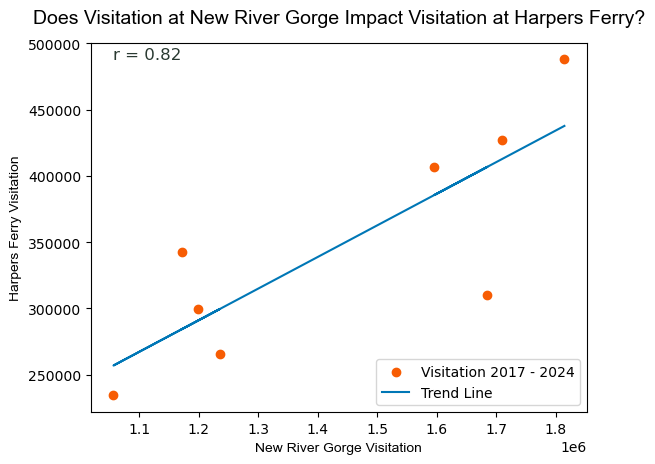

In [327]:
# Example: Assume df1 and df2 each have a column 'value'
x = nrg['total_visitation']
y = hrpferry['total_visitation']

plt.scatter(x, y, color='#F75C03', label='Visitation 2017 - 2024')

coefficients = np.polyfit(x, y, 1)  # Linear fit
trend_line = np.poly1d(coefficients)
plt.plot(x, trend_line(x), color='#0077B6', label='Trend Line')

r, p = pearsonr(x, y)
plt.text(min(x), max(y), f'r = {r:.2f}', fontsize=12, color='#2A3A32')

plt.xlabel('New River Gorge Visitation', font= 'Arial')
plt.ylabel('Harpers Ferry Visitation', font = 'Arial')
plt.title('Does Visitation at New River Gorge Impact Visitation at Harpers Ferry?', y=1.03, font = 'Arial', fontsize = 14)
plt.legend()
plt.grid(False)
plt.show()

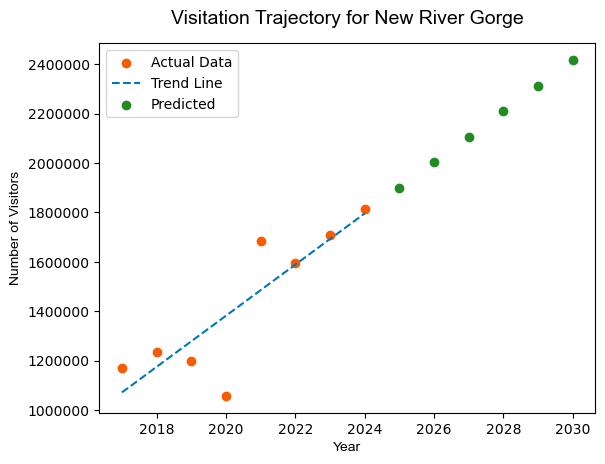

In [326]:
from sklearn.linear_model import LinearRegression

# Reshape for scikit-learn
X = nrg['year'].values.reshape(-1, 1)
y = nrg['total_visitation'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
future_visits = model.predict(future_years)

# Plot
plt.scatter(X, y, color='#F75C03', label='Actual Data')
plt.plot(X, model.predict(X), color='#0077B6', linestyle='--', label='Trend Line')
plt.scatter(future_years, future_visits, color='#228B22', label='Predicted')

plt.xlabel("Year", font= 'Arial')
plt.ylabel("Number of Visitors", font = 'Arial')
plt.title("Visitation Trajectory for New River Gorge", y = 1.03, font = 'Arial', fontsize = 14)
plt.legend()
plt.grid(False)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

In [316]:
# Print predictions
for year, pred in zip(future_years.ravel(), future_visits):
    print(f"Estimated visitors in {year}: {pred:.0f} thousand")

Estimated visitors in 2025: 1899195 thousand
Estimated visitors in 2026: 2002739 thousand
Estimated visitors in 2027: 2106283 thousand
Estimated visitors in 2028: 2209827 thousand
Estimated visitors in 2029: 2313371 thousand
Estimated visitors in 2030: 2416915 thousand
